PREDICTING COVID-19 MORTALITY RISK: A CRISP-DM BASED EXPLORATION


This data investigation will focus on understanding the dataset sourced from the Centers for Disease Control and Prevention (CDC), which tracks COVID-19 cases and trends across the United States. The primary objective is to predict the risk of death associated with COVID-19, aiming to ascertain the likelihood of mortality in individuals diagnosed with the virus. The investigation will be conducted in accordance with the Cross-Industry Standard Process for Data Mining (CRISP-DM) methodology, with particular emphasis on the Data Understanding and Data Preparation phases.

In the Data Understanding phase, the investigation will involve examining each feature's description, value distribution, and relevance to the business goal of predicting COVID-19 mortality risk. This will include identifying potential data quality issues such as missing values, duplicate rows, and cardinalities (number of distinct values) to assess feature relevance. 

In the Data Preparation phase, the investigation will focus on addressing the identified data quality issues to ensure the integrity and accuracy of the dataset. This may involve imputing missing values, removing duplicate rows, and handling outliers appropriately. Additionally, feature engineering techniques may be employed to create new variables or transform existing ones to better represent the relationships between features and the target variable (COVID-19 mortality risk).

Overall, the data investigation will be conducted methodically, following the CRISP-DM methodology, to achieve a comprehensive understanding of the dataset and prepare it effectively for subsequent analyses aimed at predicting COVID-19 mortality risk.

This notebook is divided into 4 main parts:

- PART ONE: Understanding Dataset;
- PART TWO: Cleaning Dataset;
- PART THREE: Exploring Feature Correlation;
- PART FOUR: Creating new features (please note that while the notebook will be used to develop new features, this final section serves as a record of the specific features already created during the process).


PART ONE: Understanding Dataset

DESCRIPTION: Understanding data to prepare Data Quality Report

- Checking how many rows and columns the dataset has:

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from scipy.stats import pearsonr
from scipy.stats import chi2_contingency


df = pd.read_csv('covid19-cdc-23221657.csv')

print("number of rows and columns:", df.shape)

/var/folders/6j/tmdg_xx172xb1xtgxd35y2400000gn/T/ipykernel_29052/2398835189.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


number of rows and columns: (50000, 19)


- Printing the first 5 rows to get a glimpse of the data:

In [2]:
print("The first 5 rows are: ")
df.head(5)

The first 5 rows are: 


,case_month,res_state,state_fips_code,res_county,county_fips_code,age_group,sex,race,ethnicity,case_positive_specimen_interval,case_onset_interval,process,exposure_yn,current_status,symptom_status,hosp_yn,icu_yn,death_yn,underlying_conditions_yn
0,2020-07,FL,12.0,MIAMI-DADE,12086.0,65+ years,Female,White,Hispanic/Latino,NaN,NaN,Missing,Missing,Laboratory-confirmed case,Missing,Unknown,Missing,Yes,NaN
1,2021-01,FL,12.0,SEMINOLE,12117.0,65+ years,Female,White,Non-Hispanic/Latino,0.0,NaN,Missing,Missing,Laboratory-confirmed case,Missing,No,Missing,Yes,NaN
2,2020-12,AZ,4.0,PIMA,4019.0,65+ years,Female,White,Non-Hispanic/Latino,NaN,NaN,Missing,Missing,Probable Case,Missing,Missing,Missing,Yes,NaN
3,2022-01,TN,47.0,NaN,NaN,65+ years,Female,White,Non-Hispanic/Latino,1.0,0.0,Missing,Missing,Laboratory-confirmed case,Symptomatic,Yes,Missing,Yes,Yes
4,2020-06,CA,6.0,FRESNO,6019.0,65+ years,Male,White,Non-Hispanic/Latino,NaN,0.0,Missing,Missing,Laboratory-confirmed case,Symptomatic,No,Missing,Yes,NaN


- Printing the last 5 rows to get a glimpse of the data:

In [3]:
print("The last 5 rows are: ")
df.tail(5)

The last 5 rows are: 


,case_month,res_state,state_fips_code,res_county,county_fips_code,age_group,sex,race,ethnicity,case_positive_specimen_interval,case_onset_interval,process,exposure_yn,current_status,symptom_status,hosp_yn,icu_yn,death_yn,underlying_conditions_yn
49995,2021-07,FL,12.0,MIAMI-DADE,12086.0,0 - 17 years,Male,White,Non-Hispanic/Latino,NaN,0.0,Missing,Missing,Laboratory-confirmed case,Symptomatic,No,Missing,No,NaN
49996,2022-05,NC,37.0,WAKE,37183.0,50 to 64 years,Female,Asian,Unknown,0.0,NaN,Missing,Missing,Laboratory-confirmed case,Unknown,Unknown,Unknown,No,NaN
49997,2021-07,TX,48.0,BEXAR,48029.0,18 to 49 years,Male,White,Hispanic/Latino,NaN,NaN,Missing,Missing,Laboratory-confirmed case,Missing,No,Missing,No,NaN
49998,2022-01,MN,27.0,ST. LOUIS,27137.0,18 to 49 years,Male,Multiple/Other,Missing,0.0,NaN,Missing,Missing,Laboratory-confirmed case,Missing,Missing,Missing,No,NaN
49999,2022-07,NJ,34.0,ATLANTIC,34001.0,18 to 49 years,Female,Black,Non-Hispanic/Latino,0.0,NaN,Missing,Missing,Laboratory-confirmed case,Missing,No,Missing,No,NaN


- Examining variable types for determining which features are best suited for analysis as continuous or categorical data:

In [4]:
df.dtypes

case_month                          object
res_state                           object
state_fips_code                    float64
res_county                          object
county_fips_code                   float64
age_group                           object
sex                                 object
race                                object
ethnicity                           object
case_positive_specimen_interval    float64
case_onset_interval                float64
process                             object
exposure_yn                         object
current_status                      object
symptom_status                      object
hosp_yn                             object
icu_yn                              object
death_yn                            object
underlying_conditions_yn            object
dtype: object

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 19 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   case_month                       50000 non-null  object 
 1   res_state                        50000 non-null  object 
 2   state_fips_code                  50000 non-null  float64
 3   res_county                       47065 non-null  object 
 4   county_fips_code                 47065 non-null  float64
 5   age_group                        49565 non-null  object 
 6   sex                              48847 non-null  object 
 7   race                             43818 non-null  object 
 8   ethnicity                        43224 non-null  object 
 9   case_positive_specimen_interval  26302 non-null  float64
 10  case_onset_interval              21424 non-null  float64
 11  process                          50000 non-null  object 
 12  exposure_yn       

- After careful consideration, specifying the appropriate data type for each feature:

In [6]:
data_types = {
    
    # Categorical Variables
    "case_month": "category",  # Represents the earlier month of the clinical date or the date received by CDC
    "res_state": "category",  # State of residence
    "state_fips_code": "category",  # State code
    "res_county": "category",  # County of residence
    "county_fips_code": "category", #  County code
    "age_group": "category",  # Age group
    "sex": "category",  # Sex
    "race": "category",  # Race
    "ethnicity": "category",  # Ethnicity
    "process": "category",  # Process under which the case was first identified
    "exposure_yn": "category",  # Whether the patient had any known exposures in the 14 days prior to illness onset
    "current_status": "category",  # Current status of the person
    "symptom_status": "category",  # Symptom status of the person
    "hosp_yn": "category",  # Whether the patient was hospitalized
    "icu_yn": "category",  # Whether the patient was admitted to an intensive care unit (ICU)
    "death_yn": "category",  # Whether the patient died as a result of the illness
    "underlying_conditions_yn": "category",  # Whether the patient had one or more underlying medical conditions and risk behaviors

    # Continuous Variables
    "case_positive_specimen_interval": "float",  # Weeks between the earliest date and the date of the first positive specimen collection
    "case_onset_interval": "float",  # Weeks between the earliest date and the date of symptom onset
}

df = df.astype(data_types)

print(df.dtypes)


case_month                         category
res_state                          category
state_fips_code                    category
res_county                         category
county_fips_code                   category
age_group                          category
sex                                category
race                               category
ethnicity                          category
case_positive_specimen_interval     float64
case_onset_interval                 float64
process                            category
exposure_yn                        category
current_status                     category
symptom_status                     category
hosp_yn                            category
icu_yn                             category
death_yn                           category
underlying_conditions_yn           category
dtype: object


- Checking feature's cardinalities (to identify potential problems with the data and make informed decisions about how to transform and analyze the features):

In [7]:
print("Unique values") 
for column in df:
    print(column + "," + str(len(df[column].unique())))

Unique values
case_month,40
res_state,51
state_fips_code,51
res_county,959
county_fips_code,1365
age_group,6
sex,5
race,9
ethnicity,5
case_positive_specimen_interval,75
case_onset_interval,71
process,10
exposure_yn,3
current_status,2
symptom_status,4
hosp_yn,4
icu_yn,4
death_yn,2
underlying_conditions_yn,3


- Looking for null values (for data cleaning and preparation):

In [8]:
print("Null values:")
for column in df:
    print(column + "," + str(df[column].isnull().sum() / df.shape[0]))


Null values:
case_month,0.0
res_state,0.0
state_fips_code,0.0
res_county,0.0587
county_fips_code,0.0587
age_group,0.0087
sex,0.02306
race,0.12364
ethnicity,0.13552
case_positive_specimen_interval,0.47396
case_onset_interval,0.57152
process,0.0
exposure_yn,0.0
current_status,0.0
symptom_status,0.0
hosp_yn,0.0
icu_yn,0.0
death_yn,0.0
underlying_conditions_yn,0.9148


- Looking for constant columns (to ensure that features provide valuable information):

In [9]:
def get_constant_value_features(df):
    return [e for e in df.columns if df[e].nunique() == 1]

check_constant_values = get_constant_value_features(df)
if len(check_constant_values) == 0:
    print("No constant value features found.")
else:
    print("Constant value features found:")
    print(check_constant_values)

No constant value features found.


- Looking for constant rows (to ensure that features provide valuable information):

In [10]:
def get_constant_value_rows(df):
    return df[df.apply(lambda row: row.nunique(), axis=1) == 1]

check_constant_rows = get_constant_value_rows(df)
if check_constant_rows.empty:
    print("No constant value rows found.")
else:
    print("Constant value rows found:")
    print(check_constant_rows)


No constant value rows found.


- Looking for duplicate rows (to ensure the integrity and efficiency of future analysis):

In [11]:
duplicate_rows = df.duplicated()
num_duplicate_rows = duplicate_rows.sum()

if num_duplicate_rows == 0:
    print("No duplicate rows found.")
else:
    print("Number of duplicate rows:", num_duplicate_rows)


Number of duplicate rows: 4632


- Removing duplicate rows (9.2% of the data) while retaining a unique instance for each record - this improves the foundation for subsequent analyses. Also, applying a new dataset name to this version of the dataset ("df_new"):

In [12]:
df_new=df.drop_duplicates(subset=None, keep='first', inplace=False, ignore_index=False)

- Checking if there were actually deleted:

In [13]:
duplicate_rows = df_new.duplicated()
num_duplicate_rows = duplicate_rows.sum()

if num_duplicate_rows == 0:
    print("No duplicate rows found.")
else:
    print("Number of duplicate rows:", num_duplicate_rows)


No duplicate rows found.


- Looking for duplicate columns on the updated dataset (to ensure the integrity and efficiency of future analysis):

In [14]:
duplicate_columns = df_new.columns.duplicated()
num_duplicate_columns = duplicate_columns.sum()

if num_duplicate_columns == 0:
    print("No duplicate columns found.")
else:
    print("Number of duplicate columns:", num_duplicate_columns)


No duplicate columns found.


- Saving updated dataset to a new CSV file called "covid_database.csv" (to ensure that the processed data is preserved for future analysis and sharing):

In [15]:
df_new.to_csv('covid_database.csv')
data_types = {
    
    # Categorical Variables
    "case_month": "category",  # Represents the earlier month of the clinical date or the date received by CDC
    "res_state": "category",  # State of residence
    "state_fips_code": "category",  # State code
    "res_county": "category",  # County of residence
    "county_fips_code": "category", #  County code
    "age_group": "category",  # Age group
    "sex": "category",  # Sex
    "race": "category",  # Race
    "ethnicity": "category",  # Ethnicity
    "process": "category",  # Process under which the case was first identified
    "exposure_yn": "category",  # Whether the patient had any known exposures in the 14 days prior to illness onset
    "current_status": "category",  # Current status of the person
    "symptom_status": "category",  # Symptom status of the person
    "hosp_yn": "category",  # Whether the patient was hospitalized
    "icu_yn": "category",  # Whether the patient was admitted to an intensive care unit (ICU)
    "death_yn": "category",  # Whether the patient died as a result of the illness
    "underlying_conditions_yn": "category",  # Whether the patient had one or more underlying medical conditions and risk behaviors

    # Continuous Variables
    "case_positive_specimen_interval": "float",  # Weeks between the earliest date and the date of the first positive specimen collection
    "case_onset_interval": "float",  # Weeks between the earliest date and the date of symptom onset
}

df_new = df.astype(data_types)

print(df_new.dtypes)


case_month                         category
res_state                          category
state_fips_code                    category
res_county                         category
county_fips_code                   category
age_group                          category
sex                                category
race                               category
ethnicity                          category
case_positive_specimen_interval     float64
case_onset_interval                 float64
process                            category
exposure_yn                        category
current_status                     category
symptom_status                     category
hosp_yn                            category
icu_yn                             category
death_yn                           category
underlying_conditions_yn           category
dtype: object


- Preparing a table with descriptive statistics for all the continuous features:

In [16]:
numeric_columns = df_new.select_dtypes(['int64', 'float64']).columns
numeric_columns

Index(['case_positive_specimen_interval', 'case_onset_interval'], dtype='object')

In [17]:
summary_stats = df_new[numeric_columns].describe().T

# Calculating the percentage of missing values for each column
missing_percentage = (1 - df_new[numeric_columns].count() / len(df_new)) * 100

# Calculating the number of unique values for each column
cardinality = df_new[numeric_columns].nunique()

# Combining the existing summary statistics with the newly calculated values
summary_stats_with_missing_card = summary_stats.assign(
    percent_missing=missing_percentage,
    cardinality=cardinality
)

summary_stats_with_missing_card

,count,mean,std,min,25%,50%,75%,max,percent_missing,cardinality
case_positive_specimen_interval,26302.0,0.172420,2.435394,-105.0,0.0,0.0,0.0,115.0,47.396,74
case_onset_interval,21424.0,-0.041355,2.007424,-94.0,0.0,0.0,0.0,76.0,57.152,70


- Preparing a table with descriptive statistics for all the categorical features:

In [18]:
category_columns = df_new.select_dtypes(['category']).columns
category_columns

Index(['case_month', 'res_state', 'state_fips_code', 'res_county',
       'county_fips_code', 'age_group', 'sex', 'race', 'ethnicity', 'process',
       'exposure_yn', 'current_status', 'symptom_status', 'hosp_yn', 'icu_yn',
       'death_yn', 'underlying_conditions_yn'],
      dtype='object')

In [19]:
# Calculating summary statistics for categorical columns
summary_stats_categorical = df_new[category_columns].describe().T

# Calculating the percentage of missing values for each column
missing_percentage = (1 - df_new.count() / len(df_new)) * 100

# Calculating the mode and its frequency for each column
mode_percentage = (df_new.apply(lambda x: x.value_counts().max()) / len(df_new)) * 100

# Finding the second most frequent value and its frequency for each column
def find_second_mode(column):
    counts = column.value_counts()
    if len(counts) < 2:
        return None, None
    else:
        second_mode = counts.index[1]
        second_mode_freq = counts.iloc[1]
        return second_mode, second_mode_freq

second_mode_info = df_new.apply(find_second_mode)

# Combining the existing summary statistics with the newly calculated values

summary_stats_categorical_with_extra_info = summary_stats_categorical.assign(
    percent_missing=missing_percentage,
    mode_percent=mode_percentage,
    second_mode=second_mode_info.apply(lambda x: x[0]),
    second_mode_freq=second_mode_info.apply(lambda x: x[1]),
    second_mode_percent=(second_mode_info.apply(lambda x: x[1]) / len(df_new)) * 100
)

summary_stats_categorical_with_extra_info
# Please consider that on the following table: Unique corresponds to Cardinality, Top corresponds to Mode and Freq corresponds to Mode Frequence

,count,unique,top,freq,percent_missing,mode_percent,second_mode,second_mode_freq,second_mode_percent
case_month,50000,40,2022-01,6288,0.000,12.576,2020-12,3943.0,7.886
res_state,50000,51,NY,5646,0.000,11.292,NC,4678.0,9.356
state_fips_code,50000.0,51.0,36.0,5646.0,0.000,11.292,37.0,4678.0,9.356
res_county,47065,958,MIAMI-DADE,959,5.870,1.918,MARICOPA,820.0,1.640
county_fips_code,47065.0,1364.0,12086.0,959.0,5.870,1.918,4013.0,820.0,1.640
age_group,49565,5,18 to 49 years,20121,0.870,40.242,65+ years,14045.0,28.090
sex,48847,4,Female,25493,2.306,50.986,Male,23125.0,46.250
race,43818,8,White,30415,12.364,60.830,Black,5256.0,10.512
ethnicity,43224,4,Non-Hispanic/Latino,29668,13.552,59.336,Unknown,6797.0,13.594
process,50000,10,Missing,45411,0.000,90.822,Clinical evaluation,2153.0,4.306


- Creating plot histograms for all the continuous features (while not a definitive analysis tool, creating those graphs is an effective way to gain initial insights into the data's characteristics and potential issues before diving into more complex analysis):

array([[<Axes: title={'center': 'case_positive_specimen_interval'}>,
        <Axes: title={'center': 'case_onset_interval'}>]], dtype=object)

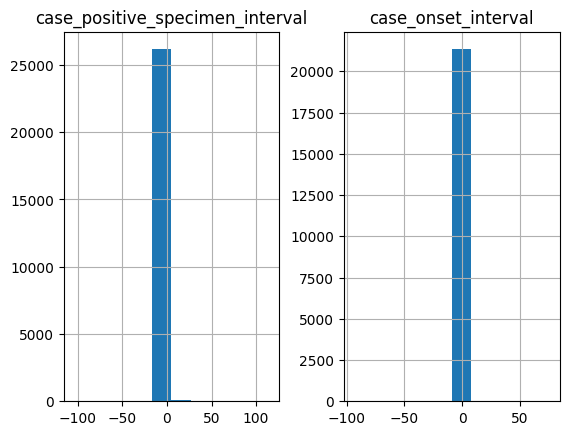

In [20]:
df_new[numeric_columns].hist()

- Creating box plots for all the continuous features (as a valuable tool for summarizing and comparing the distribution of continuous features, complementing the insights gained from histograms in data exploration):

<Axes: >

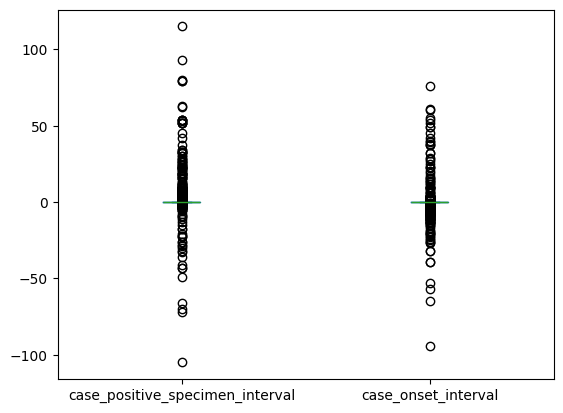

In [21]:
df_new[numeric_columns].plot(kind='box')


- Creating bar plots for all the categorical features (as a quick visual summary of the distribution of each categorical variable):

First bar plot: "case_month"

<Axes: xlabel='case_month'>

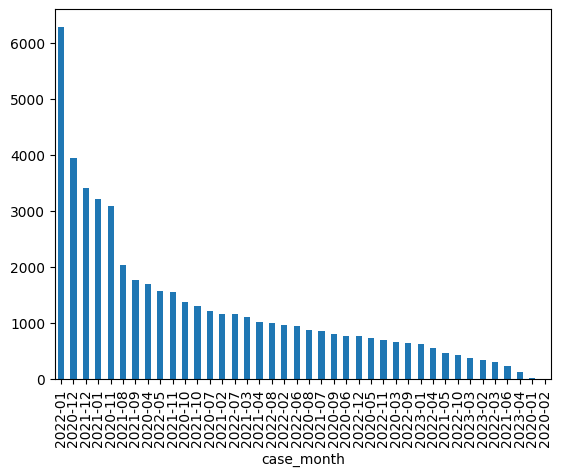

In [22]:
df_new['case_month'].value_counts(dropna = False).plot(kind='bar')

Second bar plot: "res_state" (there is no need to create a bar plot for "state_fips_code" since it contains only state codes)

<Axes: xlabel='res_state'>

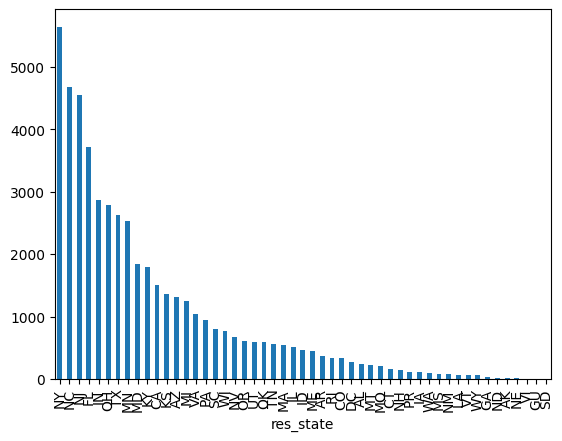

In [23]:
df_new['res_state'].value_counts(dropna = False).plot(kind='bar')

Third bar plot: "res_county" (it was needed to select the top 10 most common counties since the list of counties is too extensive to be displayed entirely; there is no need to create a bar plot for "county_fips_code" since it contains only county codes)

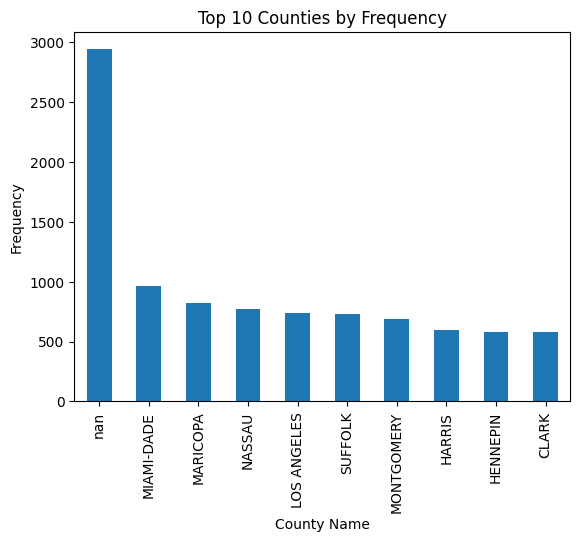

In [24]:
top_counties = df_new['res_county'].value_counts(dropna=False).head(10)

top_counties.plot(kind='bar')
plt.title('Top 10 Counties by Frequency')
plt.xlabel('County Name')
plt.ylabel('Frequency')
plt.show()


Fourth bar plot: "age_group" 

<Axes: xlabel='age_group'>

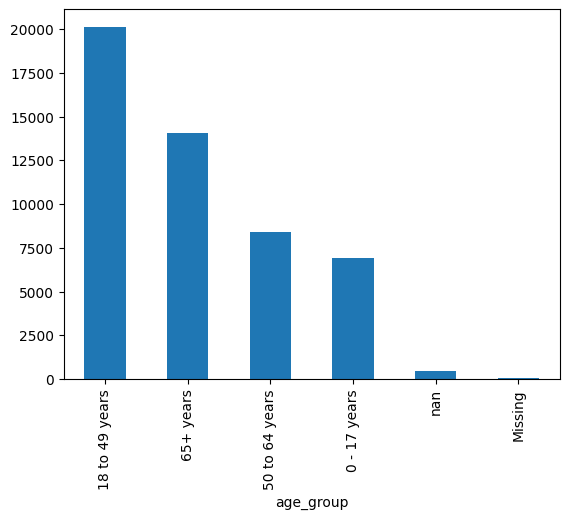

In [25]:
df_new['age_group'].value_counts(dropna = False).plot(kind='bar')

Fifth bar plot: "sex"

<Axes: xlabel='sex'>

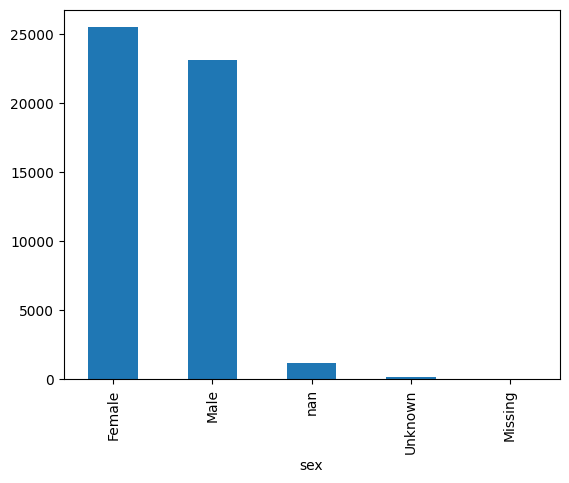

In [26]:
df_new['sex'].value_counts(dropna = False).plot(kind='bar')

Sixth bar plot: "race"

<Axes: xlabel='race'>

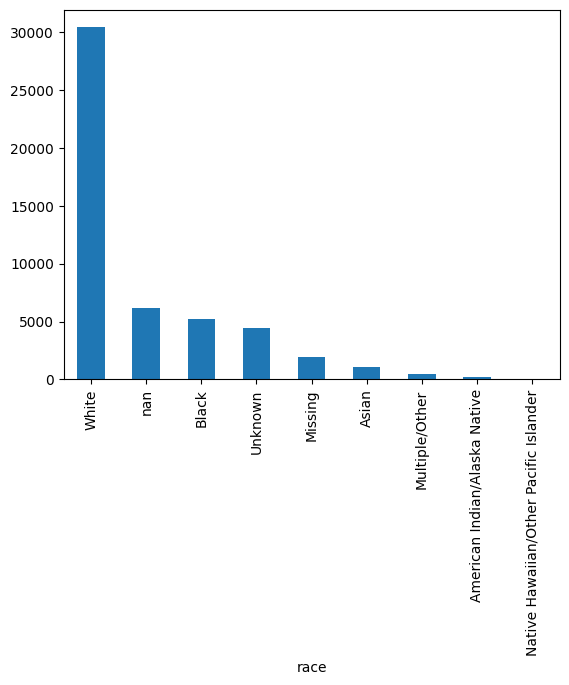

In [27]:
df_new['race'].value_counts(dropna = False).plot(kind='bar')

Seventh bar plot: "ethnicity"

<Axes: xlabel='ethnicity'>

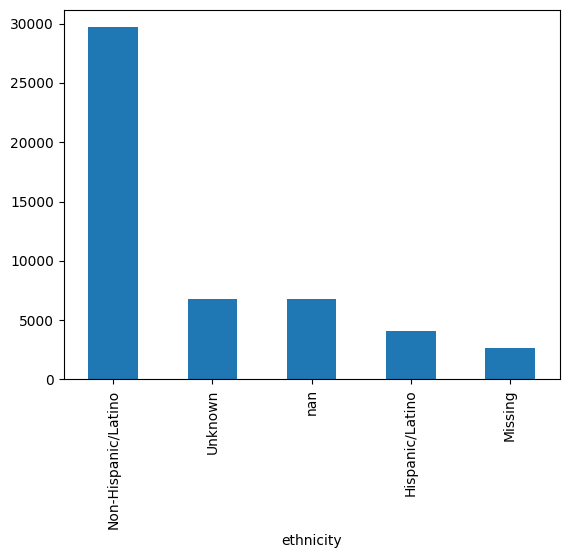

In [28]:
df_new['ethnicity'].value_counts(dropna = False).plot(kind='bar')

Eighth bar plot: "process"

<Axes: xlabel='process'>

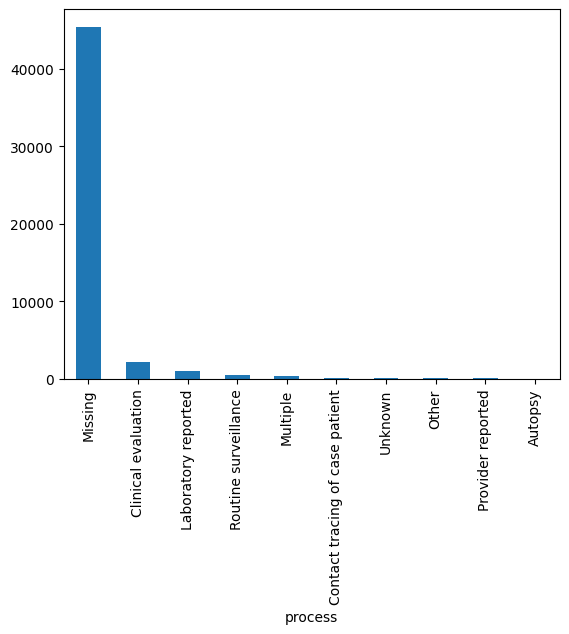

In [29]:
df_new['process'].value_counts(dropna = False).plot(kind='bar')

Ninth bar plot: "exposure_yn	"

<Axes: xlabel='exposure_yn'>

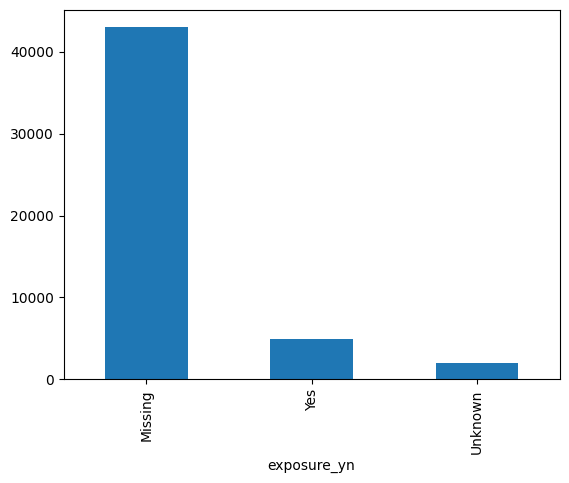

In [30]:
df_new['exposure_yn'].value_counts(dropna = False).plot(kind='bar')

Tenth bar plot: "current_status"

<Axes: xlabel='current_status'>

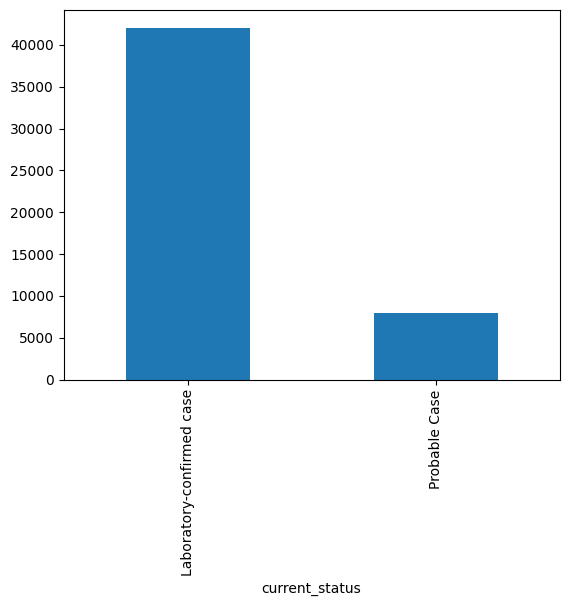

In [31]:
df_new['current_status'].value_counts(dropna = False).plot(kind='bar')

Eleventh bar plot: "symptom_status"

<Axes: xlabel='symptom_status'>

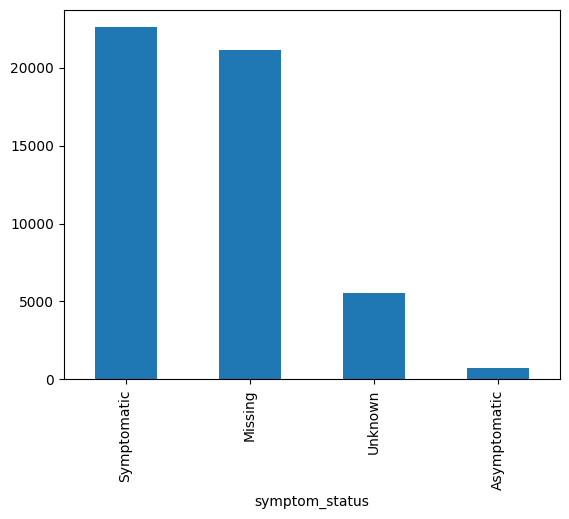

In [32]:
df_new['symptom_status'].value_counts(dropna = False).plot(kind='bar')

Twelfth bar plot: "hosp_yn"

<Axes: xlabel='hosp_yn'>

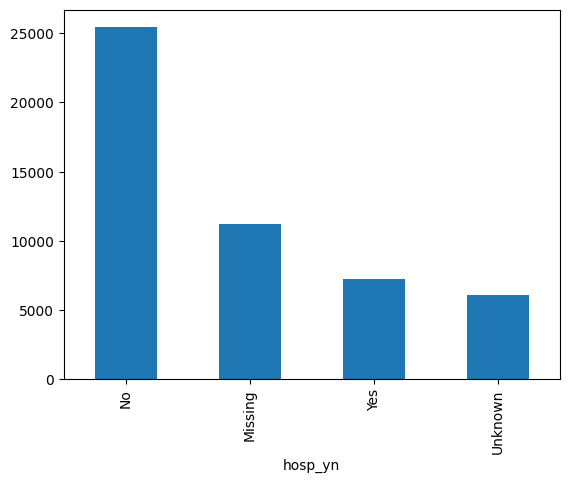

In [33]:
df_new['hosp_yn'].value_counts(dropna = False).plot(kind='bar')


Thirteenth bar plot: "icu_yn"

<Axes: xlabel='icu_yn'>

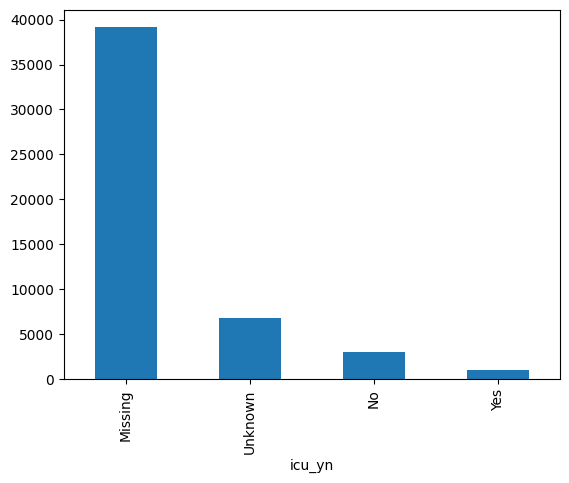

In [34]:
df_new['icu_yn'].value_counts(dropna = False).plot(kind='bar')

Fourteenth bar plot: "death_yn"

<Axes: xlabel='death_yn'>

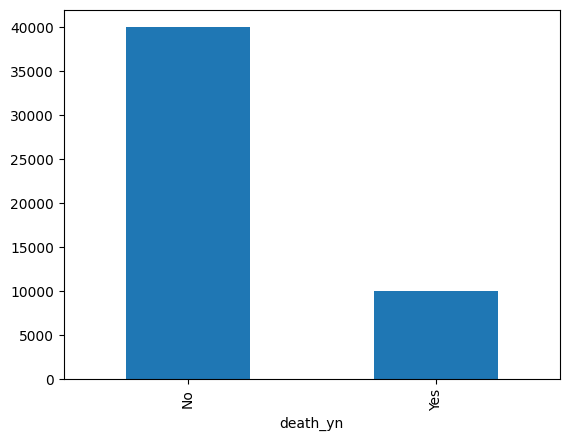

In [35]:
df_new['death_yn'].value_counts(dropna = False).plot(kind='bar')

Fifteenth bar plot: "underlying_conditions_yn"

<Axes: xlabel='underlying_conditions_yn'>

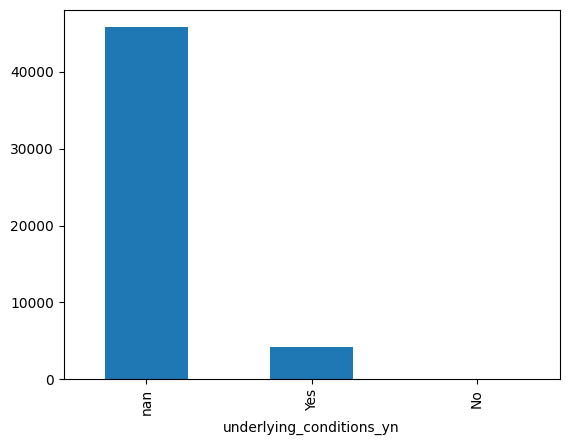

In [36]:
df_new['underlying_conditions_yn'].value_counts(dropna = False).plot(kind='bar')

PART TWO: Cleaning Dataset

DESCRIPTION: Cleaning dataset to recreate a new ABT (in accordance to the Data Quality Plan)

- Understanding discrepancies between "res_county" and "county_fips_code" cardnality entries:

In [37]:
# Filtering the dataframe for rows where the county name is "SANTA CRUZ", for example
miami_dade_data = df_new[df_new['res_county'] == 'SANTA CRUZ']

# Displaying the rows containing "SANTA CRUZ" county and its corresponding FIPS code
print(miami_dade_data[['res_county', 'county_fips_code']])

# As verified bellow, same county names can correspond to different counties. That's the reason why "county_fips_code" has more entries compared to "res_county"

       res_county county_fips_code
2289   SANTA CRUZ           6087.0
7175   SANTA CRUZ           6087.0
7866   SANTA CRUZ           6087.0
18879  SANTA CRUZ           4023.0
24866  SANTA CRUZ           4023.0
27169  SANTA CRUZ           4023.0
29441  SANTA CRUZ           4023.0
34226  SANTA CRUZ           4023.0
34465  SANTA CRUZ           4023.0
34733  SANTA CRUZ           4023.0
35327  SANTA CRUZ           4023.0
39073  SANTA CRUZ           4023.0
40482  SANTA CRUZ           4023.0
40716  SANTA CRUZ           4023.0
46155  SANTA CRUZ           4023.0
48539  SANTA CRUZ           4023.0
49240  SANTA CRUZ           4023.0


- "res_county" and "county_fips_code": due to the dataset's 6% missing values and high variance of values, rows with null values will be removed:

In [38]:
df_new = df_new.dropna(subset=["res_county", "county_fips_code"])

- Checking if the null rows in "res_county" and "county_fips_code" were actually deleted:

In [39]:
null_count_res_county = df_new["res_county"].isnull().sum()
null_count_county_fips_code= df_new["county_fips_code"].isnull().sum()

print("Null values in 'res_county':", null_count_res_county)
print("Null values in 'county_fips_code':", null_count_county_fips_code)


Null values in 'res_county': 0
Null values in 'county_fips_code': 0


- Converting "county_fips_code" and "state_fips_code" from float to integers (since FIPS codes are not intended for mathematical operations but rather as identifiers, it's more appropriate to represent them as integers rather than floats):

In [40]:
df_new['county_fips_code'] = df_new['county_fips_code'].astype(int)
df_new['state_fips_code'] = df_new['state_fips_code'].astype(int)

- Verifying whether the values of the "county_fips_code" and "state_fips_code" features were successfully converted to integers:

In [41]:
print(df_new.dtypes)

case_month                         category
res_state                          category
state_fips_code                       int64
res_county                         category
county_fips_code                      int64
age_group                          category
sex                                category
race                               category
ethnicity                          category
case_positive_specimen_interval     float64
case_onset_interval                 float64
process                            category
exposure_yn                        category
current_status                     category
symptom_status                     category
hosp_yn                            category
icu_yn                             category
death_yn                           category
underlying_conditions_yn           category
dtype: object


- "sex": due to the dataset's 2.5% missing values and close variance between genders, rows with null values will be removed:

In [42]:
df_new.dropna(subset=["sex"], inplace=True)

- Checking if the null rows in "sex" were actually deleted:

In [43]:
null_sex = df_new["sex"].isnull().sum()
print("Null values in 'sex':", null_sex)

Null values in 'sex': 0


- "age_group": due low percentage of missing values (0.9%) and low variability, imputation with the mode will be applied:

In [44]:
mode_age_group = df_new["age_group"].mode()[0]
df_new["age_group"].fillna(mode_age_group, inplace=True)

/var/folders/6j/tmdg_xx172xb1xtgxd35y2400000gn/T/ipykernel_29052/1149958964.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_new["age_group"].fillna(mode_age_group, inplace=True)


- Checking if the null rows in "age_group" were actually imputed:

In [45]:
null_age = df_new["age_group"].isnull().sum()
print("Null values in 'age_group':", null_age)

Null values in 'age_group': 0


- "race": due to the dataset's 12.8% missing values and small variance, rows with empty values will be imputed using the mode:

In [46]:
mode_race = df_new["race"].mode()[0]
df_new["race"].fillna(mode_race, inplace=True)


/var/folders/6j/tmdg_xx172xb1xtgxd35y2400000gn/T/ipykernel_29052/2131107456.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_new["race"].fillna(mode_race, inplace=True)


- Checking if the null rows in "race" were actually imputed:

In [47]:
null_race = df_new["race"].isnull().sum()
print("Null values in 'race':", null_race)

Null values in 'race': 0


- "ethnicity": due to the dataset's 14.1% missing values and small variance, rows with empty values will be imputed using the mode:

In [48]:
mode_ethnicity = df_new["ethnicity"].mode()[0]
df_new["ethnicity"].fillna(mode_ethnicity, inplace=True)

/var/folders/6j/tmdg_xx172xb1xtgxd35y2400000gn/T/ipykernel_29052/2930304292.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_new["ethnicity"].fillna(mode_ethnicity, inplace=True)


- Checking if the null rows in "ethnicity" were actually imputed:

In [49]:
null_ethnicity = df_new["ethnicity"].isnull().sum()
print("Null values in 'ethnicity':", null_ethnicity)

Null values in 'ethnicity': 0


- "process": due its high percentage of missing values (90%), feature will be deleted:

In [50]:
df_new.drop(columns=['process'], inplace=True)

- Checking if the feature "process" was actually deleted:

In [51]:
columns_after_process = df_new.columns.tolist()

if 'process' not in columns_after_process:
    print("Feature 'process' was successfully deleted.")
else:
    print("Feature 'process' was not deleted.")

Feature 'process' was successfully deleted.


- "exposure_yn": due its high percentage of missing values (84.8%), feature will be deleted:

In [52]:
df_new.drop(columns=['exposure_yn'], inplace=True)

- Checking if the feature "exposure_yn" was actually deleted:

In [53]:
columns_after_exposure = df_new.columns.tolist()

if 'exposure_yn' not in columns_after_exposure:
    print("Feature 'exposure_yn' was successfully deleted.")
else:
    print("Feature 'exposure_yn' was not deleted.")

Feature 'exposure_yn' was successfully deleted.


- "icu_yn": due its high percentage of missing values (77.8%), feature will be deleted:

In [54]:
df_new.drop(columns=['icu_yn'], inplace=True)

- Checking if the feature "icu_yn" was actually deleted:

In [55]:
df_new.columns.tolist()

if 'icu_yn' not in df_new:
    print("Feature 'icu_yn' was successfully deleted.")
else:
    print("Feature 'icu_yn' was not deleted.")

Feature 'icu_yn' was successfully deleted.


- "underlying_conditions_yn": due its high percentage of missing values (90.9%), feature will be deleted:

In [56]:
df_new.drop(columns=['underlying_conditions_yn'], inplace=True)

- Checking if the feature "underlying_conditions" was actually deleted:

In [57]:
columns_after_underlying = df_new.columns.tolist()

if 'underlying_conditions_yn' not in columns_after_underlying:
    print("Feature 'underlying_conditions_yn' was successfully deleted.")
else:
    print("Feature 'underlying_conditions_yn' was not deleted.")

Feature 'underlying_conditions_yn' was successfully deleted.


- "age_group": creating a new derived ordinal feature. It increases flexibility, compatibility, and interpretability, ultimately enhancing the analysis and modeling process. The original feature will be also kept:

In [58]:
# Mapping dictionary for age groups
age_group_mapping = {
    '0 - 17 years': 1,
    '18 to 49 years': 2,
    '50 to 64 years': 3,
    '65+ years': 4,
    'Unknown': 5,
    'Missing': 6
}

# Create a new column 'age_group_numeric' based on the mapping
df_new['age_group_numeric'] = df_new['age_group'].map(age_group_mapping)


- Checking the new "age_group_numeric":

In [59]:
print(df_new[['age_group', 'age_group_numeric']])


            age_group age_group_numeric
0           65+ years                 4
1           65+ years                 4
2           65+ years                 4
4           65+ years                 4
5           65+ years                 4
...               ...               ...
49995    0 - 17 years                 1
49996  50 to 64 years                 3
49997  18 to 49 years                 2
49998  18 to 49 years                 2
49999  18 to 49 years                 2

[46173 rows x 2 columns]


- "death_yn": creating a new derived boolean feature (1 for death and 0 for non-death). It increases flexibility, compatibility, and interpretability, ultimately enhancing the analysis and modeling process. The original feature will be kept:

In [60]:
mapping = {'Yes': 1, 'No': 0}

df_new['death_yn_numeric'] = df['death_yn'].map(mapping)

- Checking the new "death_yn_numeric":

In [61]:
print(df_new[['death_yn', 'death_yn_numeric']])

      death_yn death_yn_numeric
0          Yes                1
1          Yes                1
2          Yes                1
4          Yes                1
5          Yes                1
...        ...              ...
49995       No                0
49996       No                0
49997       No                0
49998       No                0
49999       No                0

[46173 rows x 2 columns]


- Creating new correlated features, "case_positive_specimen_interval" and "case_onset_interval," measured in days enhances the granularity of the features. The original features will be retained, at least temporarily, for safety reasons:

In [62]:
df_new['case_positive_specimen_interval_days'] = df_new['case_positive_specimen_interval'] * 7
df_new['case_onset_interval_days'] = df_new['case_onset_interval'] * 7

- Preparing a table with descriptive statistics for all the updated continuous features:

In [63]:
numeric_columns_2 = df_new.select_dtypes(['int64', 'float64']).columns
numeric_columns_2

Index(['state_fips_code', 'county_fips_code',
       'case_positive_specimen_interval', 'case_onset_interval',
       'case_positive_specimen_interval_days', 'case_onset_interval_days'],
      dtype='object')

- Comparing stats between "case_positive_specimen_interval" and "case_onset_interval", measured in weeks and days:

In [64]:
summary_stats_2 = df_new[numeric_columns_2].describe().T

# Calculating the percentage of missing values for each column
missing_percentage = (1 - df_new[numeric_columns_2].count() / len(df_new)) * 100

# Calculating the number of unique values for each column
cardinality = df_new[numeric_columns_2].nunique()

# Combining the existing summary statistics with the newly calculated values
summary_stats_with_missing_card_2 = summary_stats_2.assign(
    percent_missing=missing_percentage,
    cardinality=cardinality
)

summary_stats_with_missing_card_2

,count,mean,std,min,25%,50%,75%,max,percent_missing,cardinality
state_fips_code,46173.0,29.813159,12.895401,1.0,20.0,34.0,37.0,56.0,0.000000,48
county_fips_code,46173.0,29891.874494,12915.152096,1001.0,20091.0,34023.0,37183.0,56041.0,0.000000,1343
case_positive_specimen_interval,24115.0,0.166909,2.346889,-105.0,0.0,0.0,0.0,93.0,47.772508,71
case_onset_interval,19659.0,-0.044611,2.004368,-94.0,0.0,0.0,0.0,76.0,57.423169,65
case_positive_specimen_interval_days,24115.0,1.168360,16.428222,-735.0,0.0,0.0,0.0,651.0,47.772508,71
case_onset_interval_days,19659.0,-0.312274,14.030579,-658.0,0.0,0.0,0.0,532.0,57.423169,65


- Evaluating the relevance of "case_onset_interval_days" (considering non-null values) for death prediction can be done using linear correlation (Pearson), non-linear correlation (histogram) and its distribution with respect to death outcomes (box plot):

In [65]:
# Selecting non-null rows 
non_null_rows = df_new.dropna(subset=['case_onset_interval_days'])

# Calculating the correlation coefficient
correlation_coefficient, _ = pearsonr(non_null_rows['case_onset_interval_days'], non_null_rows['death_yn_numeric'])

print("Correlation coefficient:", correlation_coefficient)


Correlation coefficient: 0.0020029329197793454


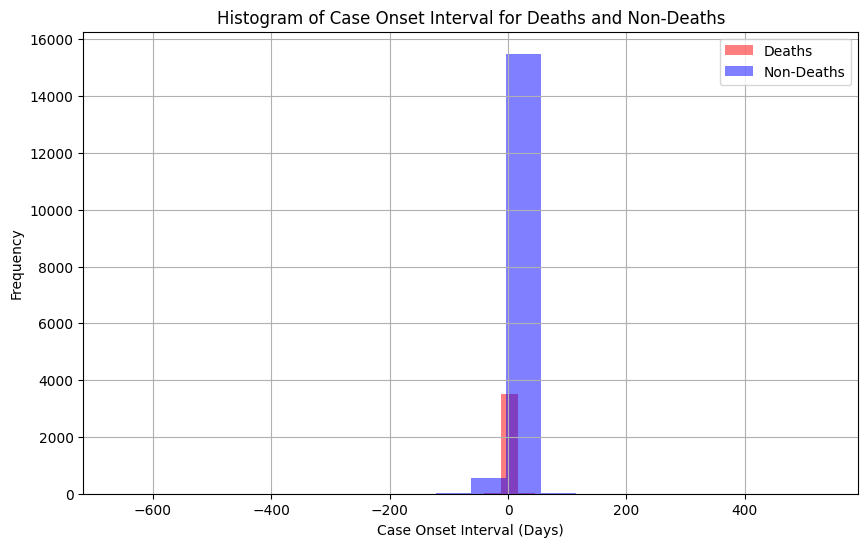

In [66]:
non_null_rows = df_new.dropna(subset=['case_onset_interval_days'])

deaths = non_null_rows[non_null_rows['death_yn_numeric'] == 1]
non_deaths = non_null_rows[non_null_rows['death_yn_numeric'] == 0]

plt.figure(figsize=(10, 6))
plt.hist(deaths['case_onset_interval_days'], bins=20, alpha=0.5, color='red', label='Deaths')
plt.hist(non_deaths['case_onset_interval_days'], bins=20, alpha=0.5, color='blue', label='Non-Deaths')

plt.xlabel('Case Onset Interval (Days)')
plt.ylabel('Frequency')
plt.title('Histogram of Case Onset Interval for Deaths and Non-Deaths')
plt.legend()

plt.grid(True)
plt.show()

<Figure size 1000x600 with 0 Axes>

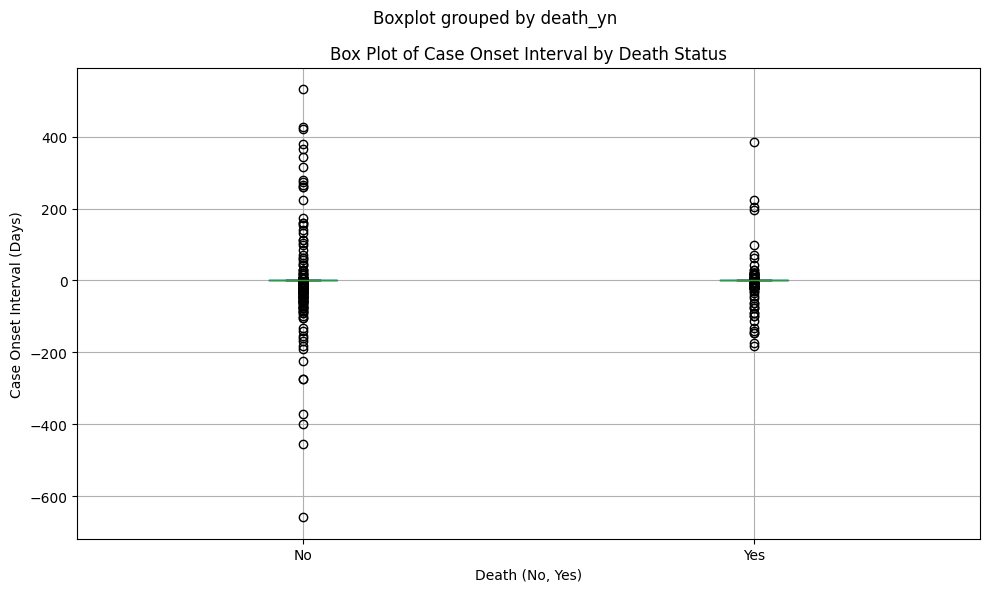

In [67]:
non_null_rows = df_new.dropna(subset=['case_onset_interval_days'])

plt.figure(figsize=(10, 6))
non_null_rows.boxplot(column='case_onset_interval_days', by='death_yn', figsize=(10, 6))

plt.xlabel('Death (No, Yes)')
plt.ylabel('Case Onset Interval (Days)')
plt.title('Box Plot of Case Onset Interval by Death Status')

plt.tight_layout()
plt.show()

- Evaluating the relevance of "case_positive_specimen_interval_days" (considering non-null values) for death prediction can be done using linear correlation (Pearson), non-linear correlation (histogram) and its distribution with respect to death outcomes (box plot):

In [68]:
# Selecting non-null rows 
non_null_rows = df_new.dropna(subset=['case_positive_specimen_interval_days'])

# Calculating the correlation coefficient
correlation_coefficient, _ = pearsonr(non_null_rows['case_positive_specimen_interval_days'], non_null_rows['death_yn_numeric'])

print("Correlation coefficient:", correlation_coefficient)


Correlation coefficient: 0.016100116554671817


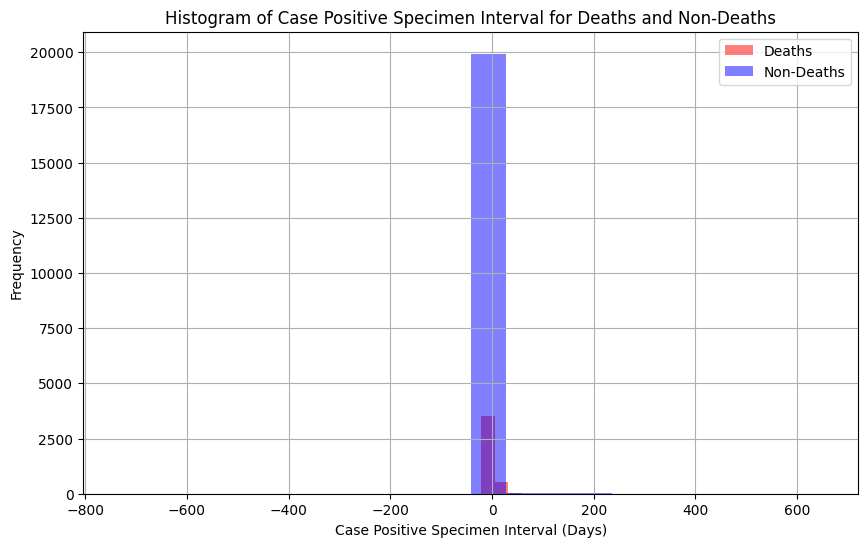

In [69]:
deaths = non_null_rows[non_null_rows['death_yn_numeric'] == 1]
non_deaths = non_null_rows[non_null_rows['death_yn_numeric'] == 0]

non_null_rows = df_new.dropna(subset=['case_positive_specimen_interval_days'])

deaths = non_null_rows[non_null_rows['death_yn_numeric'] == 1]
non_deaths = non_null_rows[non_null_rows['death_yn_numeric'] == 0]

plt.figure(figsize=(10, 6))
plt.hist(deaths['case_positive_specimen_interval_days'], bins=20, alpha=0.5, color='red', label='Deaths')
plt.hist(non_deaths['case_positive_specimen_interval_days'], bins=20, alpha=0.5, color='blue', label='Non-Deaths')

plt.xlabel('Case Positive Specimen Interval (Days)')
plt.ylabel('Frequency')
plt.title('Histogram of Case Positive Specimen Interval for Deaths and Non-Deaths')
plt.legend()

plt.grid(True)
plt.show()

<Figure size 1000x600 with 0 Axes>

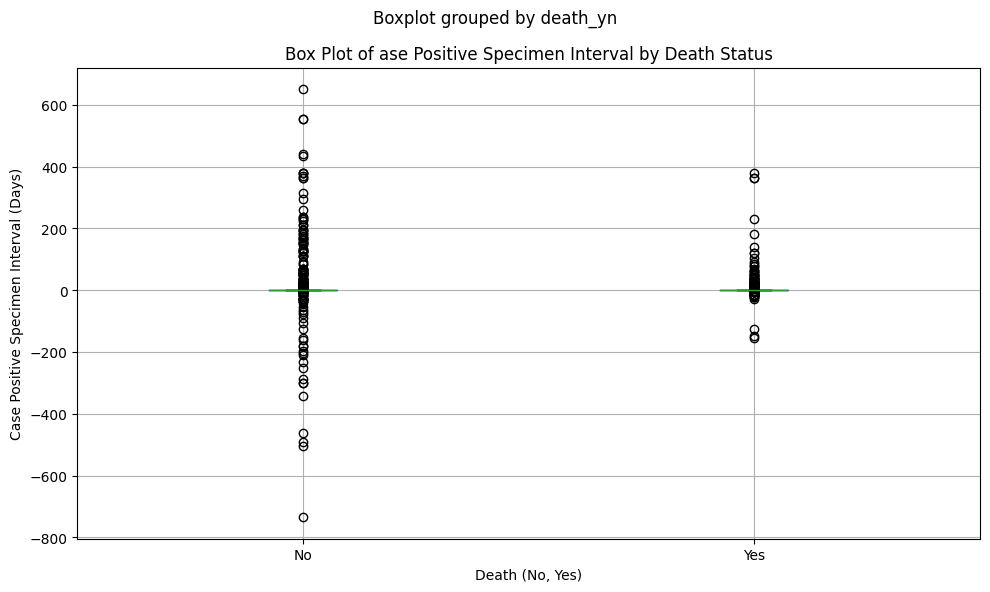

In [70]:
non_null_rows = df_new.dropna(subset=['case_positive_specimen_interval_days'])

plt.figure(figsize=(10, 6))
non_null_rows.boxplot(column='case_positive_specimen_interval_days', by='death_yn', figsize=(10, 6))

plt.xlabel('Death (No, Yes)')
plt.ylabel('Case Positive Specimen Interval (Days)')
plt.title('Box Plot of ase Positive Specimen Interval by Death Status')

plt.tight_layout()
plt.show()

- Creating derived indicator variable to flag missing values of "case_onset_interval". It's a boolean feature where 1 represents missing data and 0 represents non-missign data:

In [71]:
# When we convert True, it becomes 1, and when we convert False, it becomes 0
missing_case_onset_interval = df_new['case_onset_interval'].isnull()

#Creating a new column in the dataframe
df_new['missing_case_onset_interval'] = missing_case_onset_interval.astype(int)


- Droping "case_onset_interval" and "case_onset_interval_days" since now we will work with "missing_case_onset_interval" (as a boolean reference of missing values of "case_onset_interval"):

In [72]:
df_new.drop(['case_onset_interval', 'case_onset_interval_days'], axis=1, inplace=True)

- Dropping "case_positive_specimen_interval" since now we will work with "case_positive_specimen_interval_days" (enhancing the accuracy and precision of the feature):

In [73]:
df_new.drop(['case_positive_specimen_interval'], axis=1, inplace=True)

- "case_positive_specimen_interval_days": checking for negative interval values (which are related to possible errors in data collection, considering the nature of the feature):

In [74]:
# Filtering the data to extract rows with negative values in "case_positive_specimen_interval_days"
negative_intervals = df_new[df_new['case_positive_specimen_interval_days'] < 0]

num_negative_intervals = len(negative_intervals)
print("Number of rows with negative intervals:", num_negative_intervals)

Number of rows with negative intervals: 122


- "case_positive_specimen_interval_days": deleting negative intervals:

In [75]:
negative_intervals = df_new[df_new['case_positive_specimen_interval_days'] < 0]

#Getting the indices of rows with negative intervals
indices_to_drop = negative_intervals.index

#Dropping the rows with negative intervals
df_new.drop(indices_to_drop, inplace=True)


- "case_positive_specimen_interval_days": checking if the negative intervals were actually deleted:

In [76]:
# Filtering the data to extract rows with negative values in "case_positive_specimen_interval_days"
negative_intervals_checking = df_new[df_new['case_positive_specimen_interval_days'] < 0]

num_negative_intervals_checking = len(negative_intervals)
print("Number of rows with negative intervals now:", num_negative_intervals_checking)

Number of rows with negative intervals now: 122


- Checking "case_positive_specimen_interval_days" distribution to decide the imputation method:

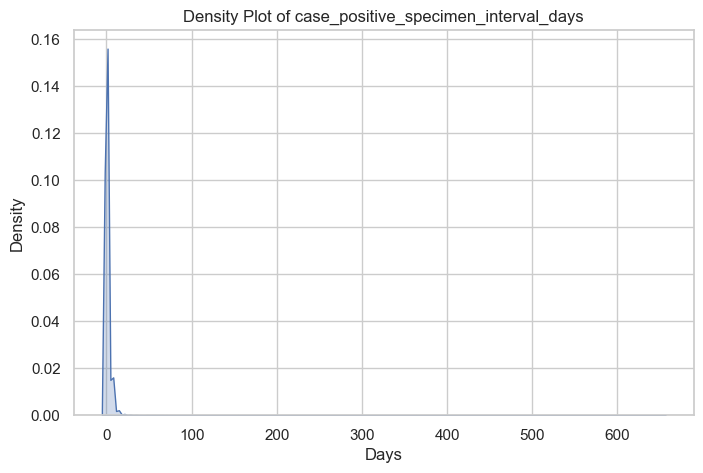

In [77]:
sns.set(style="whitegrid")

plt.figure(figsize=(8, 5))

sns.kdeplot(df_new['case_positive_specimen_interval_days'], fill=True)

plt.title('Density Plot of case_positive_specimen_interval_days')
plt.xlabel('Days')
plt.ylabel('Density')

plt.show()


- Imputing missing values of "case_positive_specimen_interval_days" with the median is a preferable strategy, especially for skewed distributions, as it ensures robustness to outliers and maintains the central tendency of the data:

In [78]:
median_value = df_new['case_positive_specimen_interval_days'].median()

df_new['case_positive_specimen_interval_days'].fillna(median_value, inplace=True)

/var/folders/6j/tmdg_xx172xb1xtgxd35y2400000gn/T/ipykernel_29052/1537594060.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_new['case_positive_specimen_interval_days'].fillna(median_value, inplace=True)


- Checking for all "Missing" and "Unknown" registered values in the dataset:

In [79]:
# Calculating the percentage of "Missing" values in each column
missing_percentages = (df_new == "Missing").mean() * 100

print("Percentage of 'Missing' values in each column:")
print(missing_percentages)

Percentage of 'Missing' values in each column:
case_month                               0.000000
res_state                                0.000000
state_fips_code                          0.000000
res_county                               0.000000
county_fips_code                         0.000000
age_group                                0.156348
sex                                      0.054288
race                                     3.936939
ethnicity                                5.333218
current_status                           0.000000
symptom_status                          42.589737
hosp_yn                                 22.800808
death_yn                                 0.000000
age_group_numeric                        0.000000
death_yn_numeric                         0.000000
case_positive_specimen_interval_days     0.000000
missing_case_onset_interval              0.000000
dtype: float64


In [80]:
# Calculating the percentage of "Unknown" values in each column
unknown_percentages = (df_new == "Unknown").mean() * 100

print("\nPercentage of 'Unknown' values in each column:")
print(unknown_percentages)



Percentage of 'Unknown' values in each column:
case_month                               0.000000
res_state                                0.000000
state_fips_code                          0.000000
res_county                               0.000000
county_fips_code                         0.000000
age_group                                0.000000
sex                                      0.403900
race                                     9.163753
ethnicity                               14.125643
current_status                           0.000000
symptom_status                          11.372174
hosp_yn                                 11.930251
death_yn                                 0.000000
age_group_numeric                        0.000000
death_yn_numeric                         0.000000
case_positive_specimen_interval_days     0.000000
missing_case_onset_interval              0.000000
dtype: float64


- Standardizing all "Missing" and "Unknown" values to "unknown" ensures consistency and simplifies data handling and interpretation:

In [81]:
# Replacing 'Missing' and 'Unknown' values with 'Unknown'
df_new.replace({'Missing': 'Unknown', 'Unknown': 'Unknown'}, inplace=True)


/var/folders/6j/tmdg_xx172xb1xtgxd35y2400000gn/T/ipykernel_29052/1596746801.py:2: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  df_new.replace({'Missing': 'Unknown', 'Unknown': 'Unknown'}, inplace=True)
/var/folders/6j/tmdg_xx172xb1xtgxd35y2400000gn/T/ipykernel_29052/1596746801.py:2: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  df_new.replace({'Missing': 'Unknown', 'Unknown': 'Unknown'}, inplace=True)
/var/folders/6j/tmdg_xx172xb1xtgxd35y2400000gn/T/ipykernel_29052/1596746801.py:2: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with Categor

- Reclassifying the dataset with new features and applying a new dataset name to this cleaned dataset ("df_corrected_dataset"), which enhances clarity and organization in data management:

In [82]:
data_types = {
    
    # Categorical Variables
    "case_month": "category",  # Represents the earlier month of the clinical date or the date received by CDC
    "res_state": "category",  # State of residence
    "state_fips_code": "category",  # State code
    "res_county": "category",  # County of residence
    "county_fips_code": "category", #  County code
    "age_group": "category",  # Age group
    "sex": "category",  # Sex
    "race": "category",  # Race
    "ethnicity": "category",  # Ethnicity"process": "category",  # Process under which the case was first identified
    "current_status": "category",  # Current status of the person
    "symptom_status": "category",  # Symptom status of the person
    "hosp_yn": "category",  # Whether the patient was hospitalized
    "death_yn": "category",  # Whether the patient died as a result of the illness
    "missing_case_onset_interval": "category",  # Boolean indicating missing values for weeks between the earliest date and the date of symptom onset
    "death_yn_numeric": "category", # Boolean indicating death or non-death
    "age_group_numeric": "category", # Ordinal feature indicating age groups
    
    # Continuous Variables
    "case_positive_specimen_interval_days": "float" # Weeks between the earliest date and the date of the first positive specimen collection
   
}

df_corrected_dataset = df_new.astype(data_types)

print(df_corrected_dataset.dtypes)


case_month                              category
res_state                               category
state_fips_code                         category
res_county                              category
county_fips_code                        category
age_group                               category
sex                                     category
race                                    category
ethnicity                               category
current_status                          category
symptom_status                          category
hosp_yn                                 category
death_yn                                category
age_group_numeric                       category
death_yn_numeric                        category
case_positive_specimen_interval_days     float64
missing_case_onset_interval             category
dtype: object


- Saving the cleaned dataset to a new CSV file named "covid_database_cleaned.csv" ensures that the processed data is preserved for future analysis and sharing:

In [83]:
df_corrected_dataset.to_csv('covid_database_cleaned.csv', index=False)

- News stats for continuous features:

In [84]:
# Summary statistics for "case_positive_specimen_interval_days" column
summary_stats_3 = df_corrected_dataset['case_positive_specimen_interval_days'].describe()

# Calculating the percentage of missing values
missing_percentage = (1 - df_corrected_dataset['case_positive_specimen_interval_days'].count() / len(df_corrected_dataset)) * 100

# Calculating the number of unique values
cardinality = df_corrected_dataset['case_positive_specimen_interval_days'].nunique()

# Creating a new DataFrame to hold the summary statistics and additional information
summary_stats_with_missing_card_3 = pd.DataFrame(summary_stats_3)

# Adding columns for the percentage of missing values and the cardinality
summary_stats_with_missing_card_3['percent_missing'] = missing_percentage
summary_stats_with_missing_card_3['cardinality'] = cardinality

summary_stats_with_missing_card_3


,case_positive_specimen_interval_days,percent_missing,cardinality
count,46051.000000,0.0,42
mean,0.770211,0.0,42
std,9.769522,0.0,42
min,0.000000,0.0,42
25%,0.000000,0.0,42
50%,0.000000,0.0,42
75%,0.000000,0.0,42
max,651.000000,0.0,42


- Checking for outliers on "case_positive_specimen_interval_days":

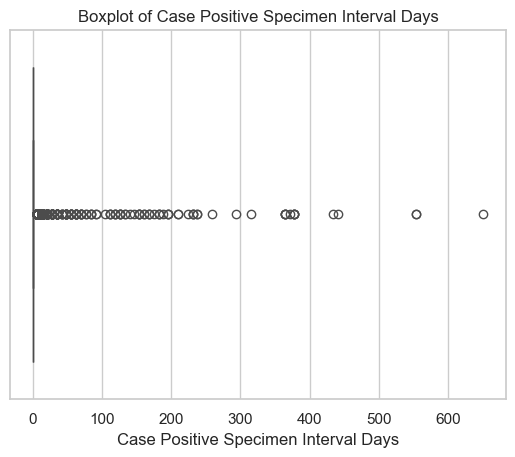

In [85]:
sns.boxplot(x=df_corrected_dataset['case_positive_specimen_interval_days'])

plt.title('Boxplot of Case Positive Specimen Interval Days')
plt.xlabel('Case Positive Specimen Interval Days')

plt.show()

- Clamping the maximum value to 3 days serves as an upper threshold based on CDC information regarding the typical turnaround time for COVID test results. For more information, please check: https://www.cdc.gov/coronavirus/2019-ncov/symptoms-testing/testing.html

In [86]:
df_corrected_dataset['case_positive_specimen_interval_days'] = df_corrected_dataset['case_positive_specimen_interval_days'].clip(lower=None, upper=3)

- New stats for "case_positive_specimen_interval_days" after clampling outliers:

In [87]:
# Summary statistics for "case_positive_specimen_interval_days" column
summary_stats_4 = df_corrected_dataset['case_positive_specimen_interval_days'].describe()

# Calculating the percentage of missing values
missing_percentage = (1 - df_corrected_dataset['case_positive_specimen_interval_days'].count() / len(df_corrected_dataset)) * 100

# Calculating the number of unique values
cardinality = df_corrected_dataset['case_positive_specimen_interval_days'].nunique()

# Creating a new aataframe to hold the summary statistics and additional information
summary_stats_with_missing_card_4 = pd.DataFrame(summary_stats_4)

# Adding columns for the percentage of missing values and the cardinality
summary_stats_with_missing_card_4['percent_missing'] = missing_percentage
summary_stats_with_missing_card_4['cardinality'] = cardinality

summary_stats_with_missing_card_4


,case_positive_specimen_interval_days,percent_missing,cardinality
count,46051.000000,0.0,2
mean,0.157456,0.0,2
std,0.669018,0.0,2
min,0.000000,0.0,2
25%,0.000000,0.0,2
50%,0.000000,0.0,2
75%,0.000000,0.0,2
max,3.000000,0.0,2


- News stats for all categorical features:

In [88]:
category_columns_2 = df_corrected_dataset.select_dtypes(['category']).columns
category_columns_2

Index(['case_month', 'res_state', 'state_fips_code', 'res_county',
       'county_fips_code', 'age_group', 'sex', 'race', 'ethnicity',
       'current_status', 'symptom_status', 'hosp_yn', 'death_yn',
       'age_group_numeric', 'death_yn_numeric', 'missing_case_onset_interval'],
      dtype='object')

In [89]:
#Calculating summary statistics for categorical columns
summary_stats_categorical = df_corrected_dataset[category_columns_2].describe().T

#Calculating the percentage of missing values for each column
missing_percentage = (1 - df_corrected_dataset.count() / len(df_corrected_dataset)) * 100

#Calculating the mode and its frequency for each column
mode_percentage = (df_corrected_dataset.apply(lambda x: x.value_counts().max()) / len(df_corrected_dataset)) * 100

#Finding the second most frequent value and its frequency for each column
def find_second_mode(column):
    counts = column.value_counts()
    if len(counts) < 2:
        return None, None
    else:
        second_mode = counts.index[1]
        second_mode_freq = counts.iloc[1]
        return second_mode, second_mode_freq

second_mode_info = df_new.apply(find_second_mode)

#Combining the existing summary statistics with the newly calculated values
summary_stats_categorical_with_extra_info = summary_stats_categorical.assign(
    percent_missing=missing_percentage,
    mode_percent=mode_percentage,
    second_mode=second_mode_info.apply(lambda x: x[0]),
    second_mode_freq=second_mode_info.apply(lambda x: x[1]),
    second_mode_percent=(second_mode_info.apply(lambda x: x[1]) / len(df_new)) * 100
)

summary_stats_categorical_with_extra_info
#Please consider that on the following table: Unique corresponds to Cardinality, Top corresponds to Mode and Freq corresponds to Mode Frequence


,count,unique,top,freq,percent_missing,mode_percent,second_mode,second_mode_freq,second_mode_percent
case_month,46051,40,2022-01,5810,0.0,12.616447,2020-12,3662.0,7.952053
res_state,46051,48,NY,5558,0.0,12.069228,NJ,4434.0,9.628455
state_fips_code,46051,48,36,5558,0.0,12.069228,34,4434.0,9.628455
res_county,46051,945,MIAMI-DADE,940,0.0,2.041215,MARICOPA,820.0,1.780635
county_fips_code,46051,1343,12086,940,0.0,2.041215,4013,820.0,1.780635
age_group,46051,5,18 to 49 years,18909,0.0,41.060998,65+ years,12883.0,27.975505
sex,46051,3,Female,24016,0.0,52.150876,Male,21824.0,47.390936
race,46051,7,White,33303,0.0,72.317648,Unknown,6033.0,13.100693
ethnicity,46051,3,Non-Hispanic/Latino,33161,0.0,72.009294,Unknown,8961.0,19.458861
current_status,46051,2,Laboratory-confirmed case,39073,0.0,84.847235,Probable Case,6978.0,15.152765


PART THREE: Exploring Feature Correlation

DESCRIPTION: Analyzing relationships between pairs of features to identify potential indicators for death prediction

- Exploring the correlation between death occurrences and the duration between specimen collection and positive test results:

/var/folders/6j/tmdg_xx172xb1xtgxd35y2400000gn/T/ipykernel_29052/945988167.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_interval_by_death = df_corrected_dataset.groupby('death_yn_numeric')['case_positive_specimen_interval_days'].mean().reset_index()
/var/folders/6j/tmdg_xx172xb1xtgxd35y2400000gn/T/ipykernel_29052/945988167.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='death_yn_numeric', y='case_positive_specimen_interval_days', data=avg_interval_by_death, palette='muted')


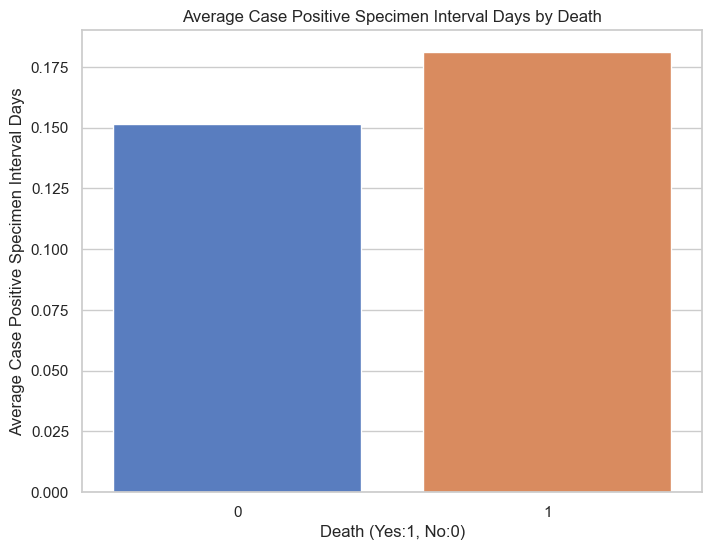

In [90]:
avg_interval_by_death = df_corrected_dataset.groupby('death_yn_numeric')['case_positive_specimen_interval_days'].mean().reset_index()

plt.figure(figsize=(8, 6))
sns.barplot(x='death_yn_numeric', y='case_positive_specimen_interval_days', data=avg_interval_by_death, palette='muted')
plt.xlabel('Death (Yes:1, No:0)')
plt.ylabel('Average Case Positive Specimen Interval Days')
plt.title('Average Case Positive Specimen Interval Days by Death')
plt.show()

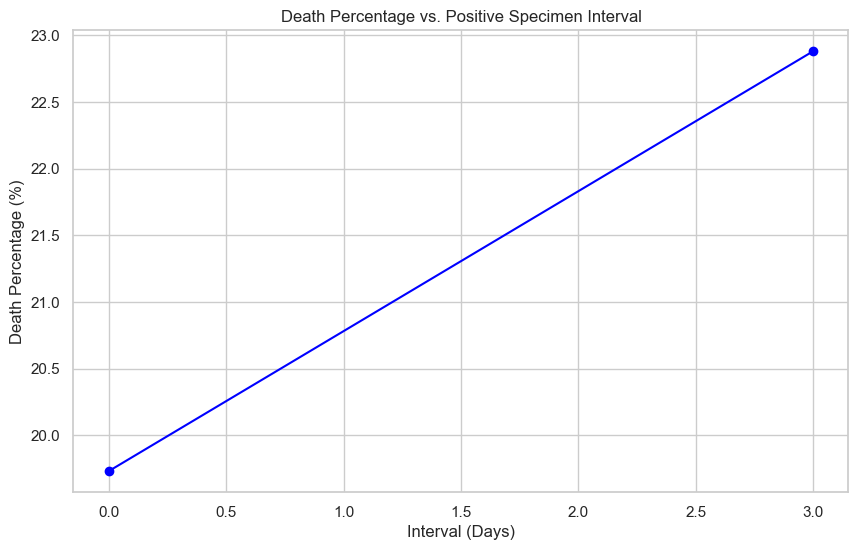

In [91]:
interval_data = df_corrected_dataset.groupby('case_positive_specimen_interval_days')['death_yn'].value_counts(normalize=True).unstack().fillna(0)
interval_data['death_percentage'] = interval_data['Yes'] * 100

plt.figure(figsize=(10, 6))
plt.plot(interval_data.index, interval_data['death_percentage'], marker='o', color='blue')
plt.title('Death Percentage vs. Positive Specimen Interval')
plt.xlabel('Interval (Days)')
plt.ylabel('Death Percentage (%)')
plt.grid(True)
plt.show()

- Investigating the correlation between age and death occurrences to understand the relationship between age demographics and mortality rates:

In [92]:
correlation = df_corrected_dataset['death_yn_numeric'].corr(df_corrected_dataset['age_group_numeric'])
print("Pearson correlation coefficient:", correlation)

Pearson correlation coefficient: 0.605227606689584


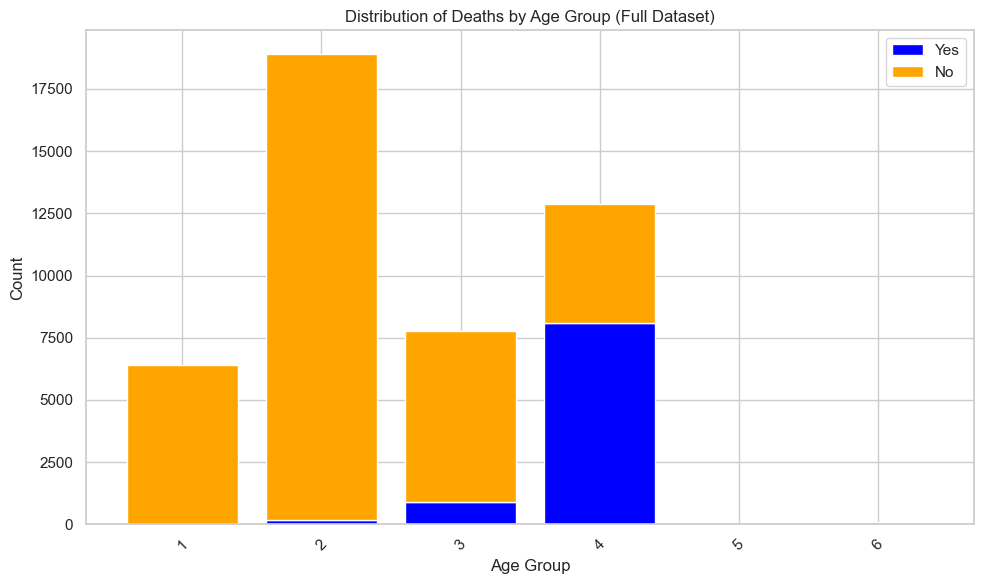

In [93]:
age_groups = df_corrected_dataset['age_group_numeric'].unique()
counts_yes = []
counts_no = []

for age_group in age_groups:
    counts_yes.append(df_corrected_dataset[(df_corrected_dataset['age_group_numeric'] == age_group) & (df_corrected_dataset['death_yn_numeric'] == 1)].shape[0])
    counts_no.append(df_corrected_dataset[(df_corrected_dataset['age_group_numeric'] == age_group) & (df_corrected_dataset['death_yn_numeric'] == 0)].shape[0])

plt.figure(figsize=(10, 6))
plt.bar(age_groups, counts_yes, label='Yes', color='blue')
plt.bar(age_groups, counts_no, bottom=counts_yes, label='No', color='orange')

plt.xlabel('Age Group')
plt.ylabel('Count')
plt.title('Distribution of Deaths by Age Group (Full Dataset)')
plt.legend()

plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


/var/folders/6j/tmdg_xx172xb1xtgxd35y2400000gn/T/ipykernel_29052/3389166356.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_group_deaths = df_corrected_dataset.groupby('age_group')['death_yn'].value_counts().unstack().fillna(0)


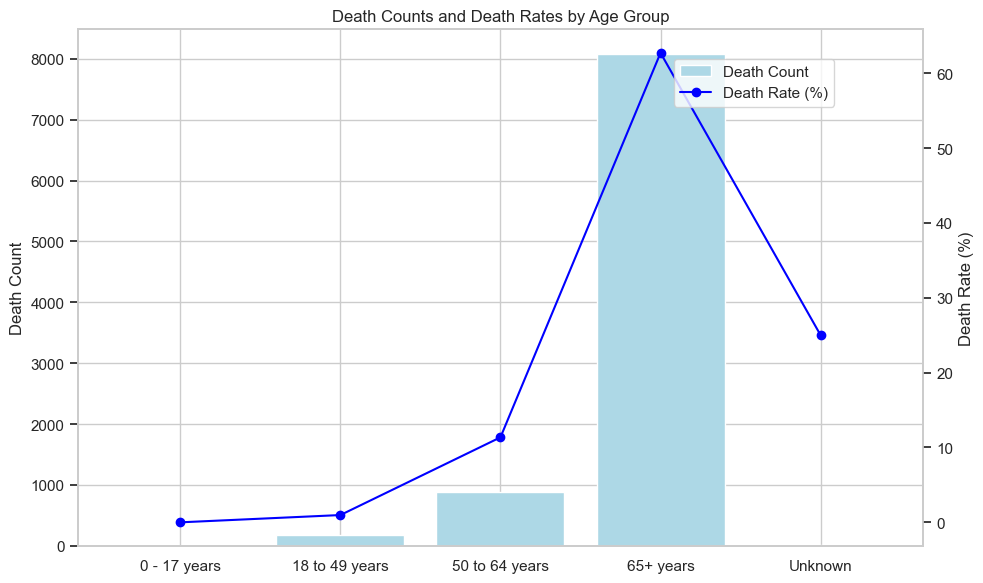

In [94]:
age_group_deaths = df_corrected_dataset.groupby('age_group')['death_yn'].value_counts().unstack().fillna(0)
age_group_deaths['death_rate'] = (age_group_deaths['Yes'] / age_group_deaths.sum(axis=1)) * 100

# Defining the age group bins
age_bins = ['0 - 17 years', '18 to 49 years', '50 to 64 years', '65+ years', 'Unknown']

age_group_deaths = age_group_deaths.reindex(age_bins, fill_value=0)

fig, ax1 = plt.subplots(figsize=(10, 6))

ax1.bar(age_group_deaths.index, age_group_deaths['Yes'], color='lightblue', label='Death Count')

ax2 = ax1.twinx()
ax2.plot(age_group_deaths.index, age_group_deaths['death_rate'], color='blue', marker='o', label='Death Rate (%)')

ax1.set_ylabel('Death Count')
ax2.set_ylabel('Death Rate (%)')
plt.title('Death Counts and Death Rates by Age Group')

fig.legend(loc="upper right", bbox_to_anchor=(0.85, 0.9))

plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

- Exploring the relationship between gender and death occurrences to understand potential gender disparities in mortality rates:

<Figure size 1200x800 with 0 Axes>

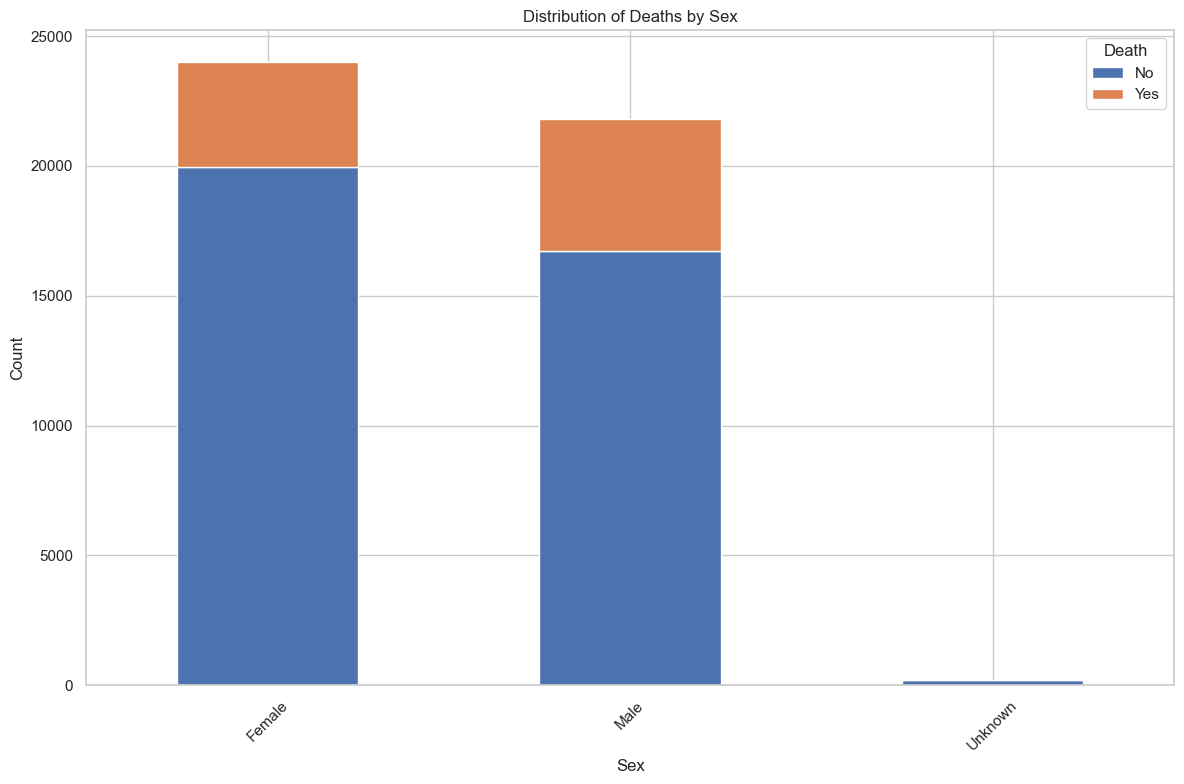

In [95]:
top_sexes = df_corrected_dataset['sex'].value_counts().nlargest(10).index

top_sexes_data = df_corrected_dataset[df_corrected_dataset['sex'].isin(top_sexes)]

cross_tab_top_sex = pd.crosstab(top_sexes_data['sex'], top_sexes_data['death_yn'])

plt.figure(figsize=(12, 8))
cross_tab_top_sex.plot(kind='bar', stacked=True, figsize=(12, 8))
plt.title('Distribution of Deaths by Sex')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Death')
plt.tight_layout()
plt.show()


- Checking percentages of death related to gender:

In [96]:
total_cases_by_sex = df_corrected_dataset['sex'].value_counts()

total_deaths_by_sex = df_corrected_dataset[df_corrected_dataset['death_yn'] == 'Yes']['sex'].value_counts()

death_percentage_by_sex = (total_deaths_by_sex / total_cases_by_sex) * 100

print("Percentage of deaths by sex:")
print(death_percentage_by_sex)

Percentage of deaths by sex:
sex
Female     16.855430
Male       23.432918
Unknown     0.473934
Name: count, dtype: float64


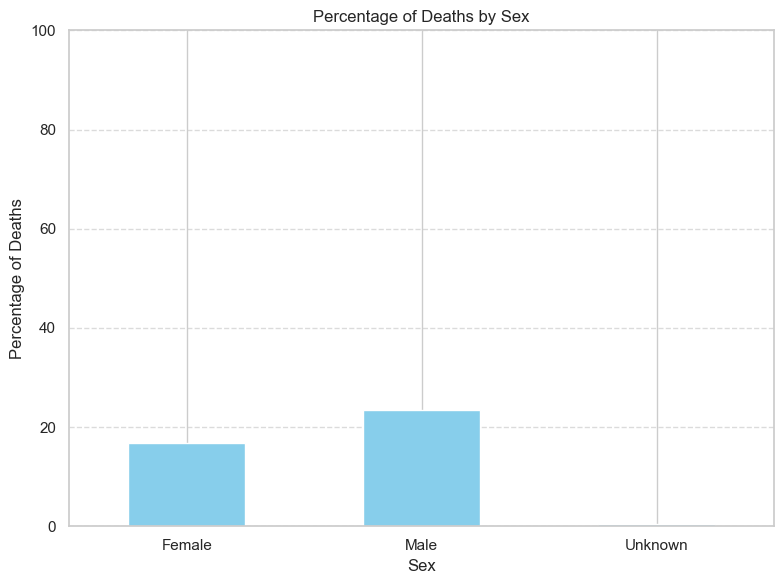

In [97]:
total_cases_by_sex = df_corrected_dataset['sex'].value_counts()

total_deaths_by_sex = df_corrected_dataset[df_corrected_dataset['death_yn'] == 'Yes']['sex'].value_counts()

death_percentage_by_sex = (total_deaths_by_sex / total_cases_by_sex) * 100

plt.figure(figsize=(8, 6))
death_percentage_by_sex.plot(kind='bar', color='skyblue')
plt.title('Percentage of Deaths by Sex')
plt.xlabel('Sex')
plt.ylabel('Percentage of Deaths')
plt.xticks(rotation=0)
plt.ylim(0, 100)  # Set y-axis limit to 0-100%
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

- Analyzing the association between race and death occurrences to examine potential disparities in mortality rates across different racial groups:

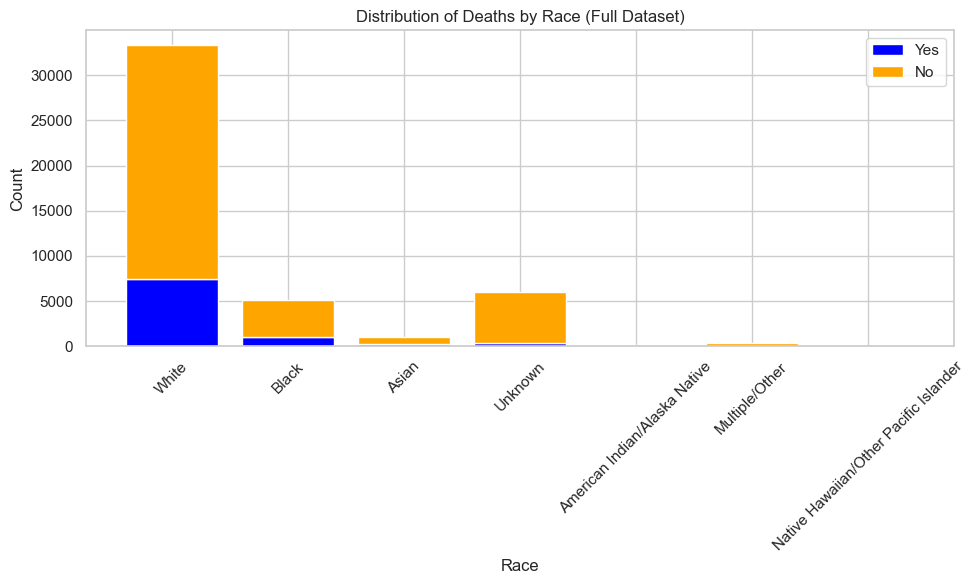

In [98]:
race_groups = df_corrected_dataset['race'].unique()
counts_yes = []
counts_no = []

for race_group in race_groups:
    counts_yes.append(df_corrected_dataset[(df_corrected_dataset['race'] == race_group) & (df_corrected_dataset['death_yn_numeric'] == 1)].shape[0])
    counts_no.append(df_corrected_dataset[(df_corrected_dataset['race'] == race_group) & (df_corrected_dataset['death_yn_numeric'] == 0)].shape[0])

plt.figure(figsize=(10, 6))
plt.bar(race_groups, counts_yes, label='Yes', color='blue')
plt.bar(race_groups, counts_no, bottom=counts_yes, label='No', color='orange')

plt.xlabel('Race')
plt.ylabel('Count')
plt.title('Distribution of Deaths by Race (Full Dataset)')
plt.legend()

plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


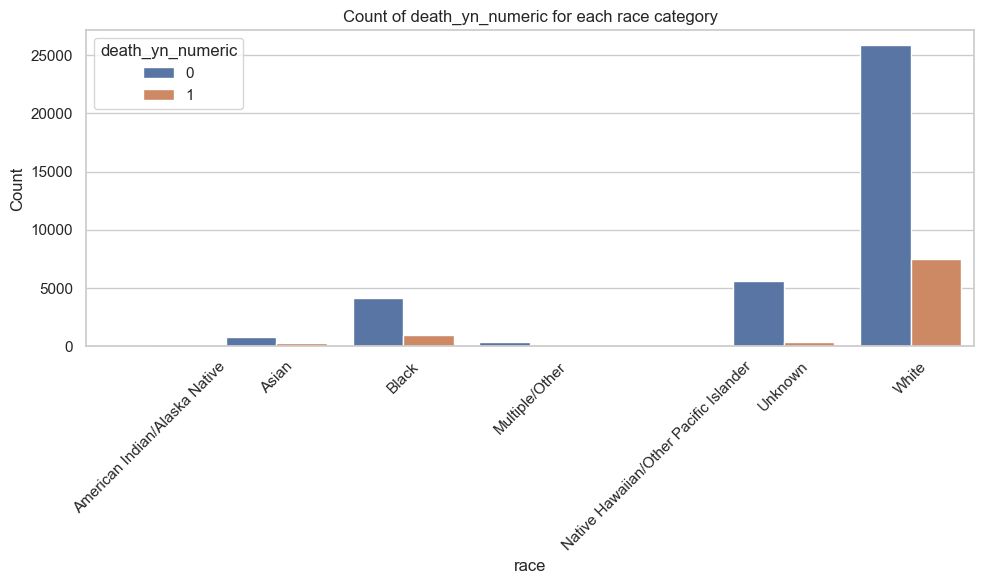

In [99]:
categorical_feature = 'race'
outcome_variable = 'death_yn_numeric'

plt.figure(figsize=(10, 6))
sns.countplot(data=df_corrected_dataset, x=categorical_feature, hue=outcome_variable)
plt.title(f'Count of {outcome_variable} for each {categorical_feature} category')
plt.xlabel(categorical_feature)
plt.ylabel('Count')
plt.legend(title=outcome_variable)
plt.xticks(rotation=45) 
plt.tight_layout()
plt.show()

- Investigating the correlation between ethnicity and death occurrences to understand potential variations in mortality rates across different ethnic groups:

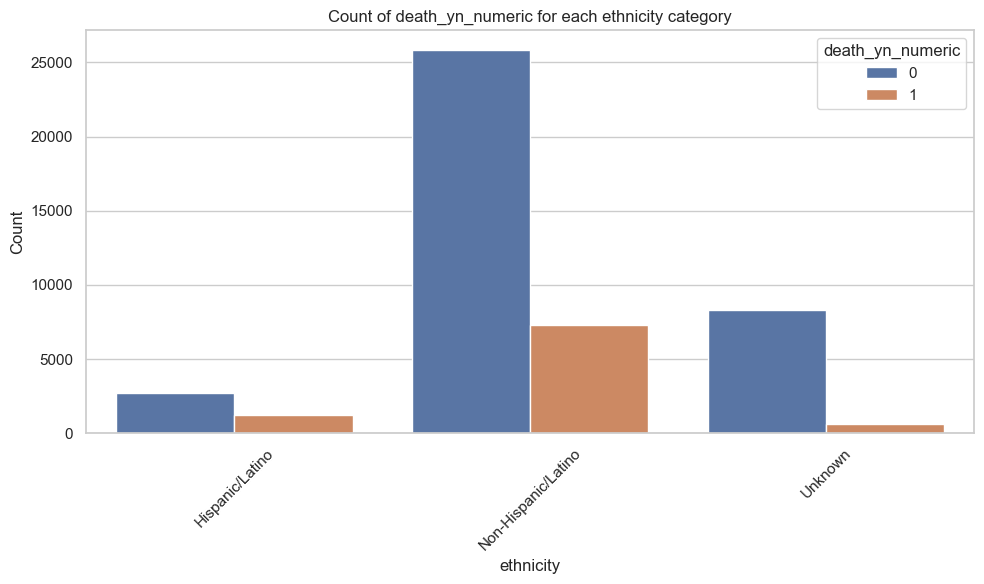

In [100]:
categorical_feature = 'ethnicity'
outcome_variable = 'death_yn_numeric'

plt.figure(figsize=(10, 6))
sns.countplot(data=df_corrected_dataset, x=categorical_feature, hue=outcome_variable)
plt.title(f'Count of {outcome_variable} for each {categorical_feature} category')
plt.xlabel(categorical_feature)
plt.ylabel('Count')
plt.legend(title=outcome_variable)
plt.xticks(rotation=45) 
plt.tight_layout()
plt.show()

- Examining the relationship between symptoms status and death occurrences to understand how the presence or absence of specific symptoms may correlate with mortality rates:

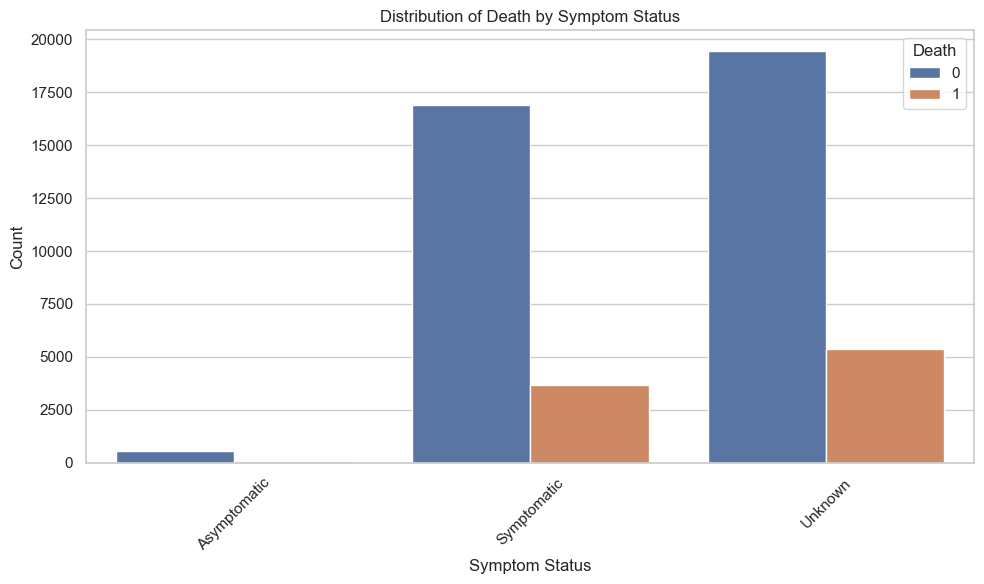

In [101]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df_corrected_dataset, x='symptom_status', hue='death_yn_numeric')
plt.title('Distribution of Death by Symptom Status')
plt.xlabel('Symptom Status')
plt.ylabel('Count')
plt.legend(title='Death')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

- Exploring the relationship between symptom status and age group, race and ethnicity to gain insights into the nature of unknown values for symptom status:

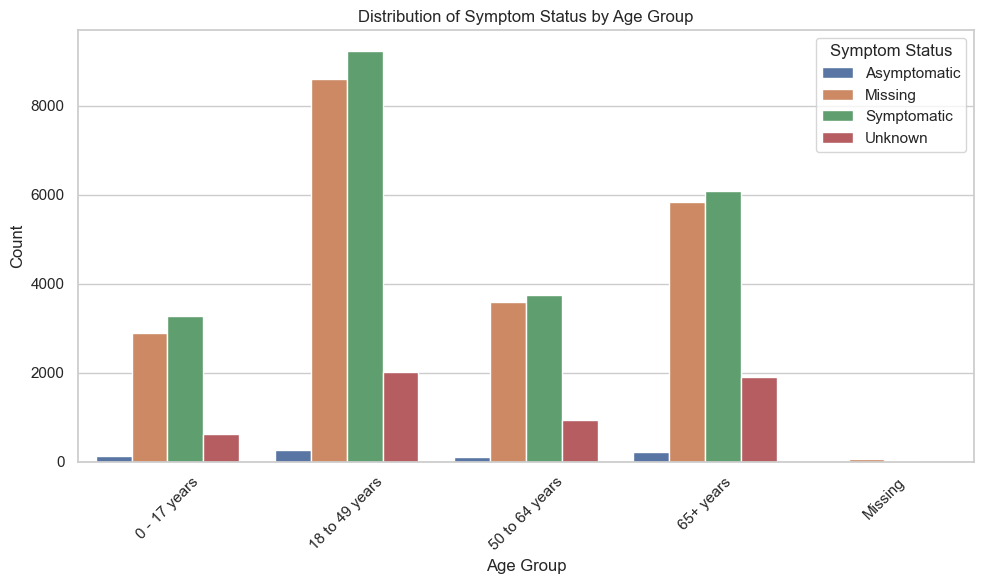

In [102]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='age_group', hue='symptom_status')
plt.title('Distribution of Symptom Status by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Symptom Status')
plt.tight_layout()
plt.show()

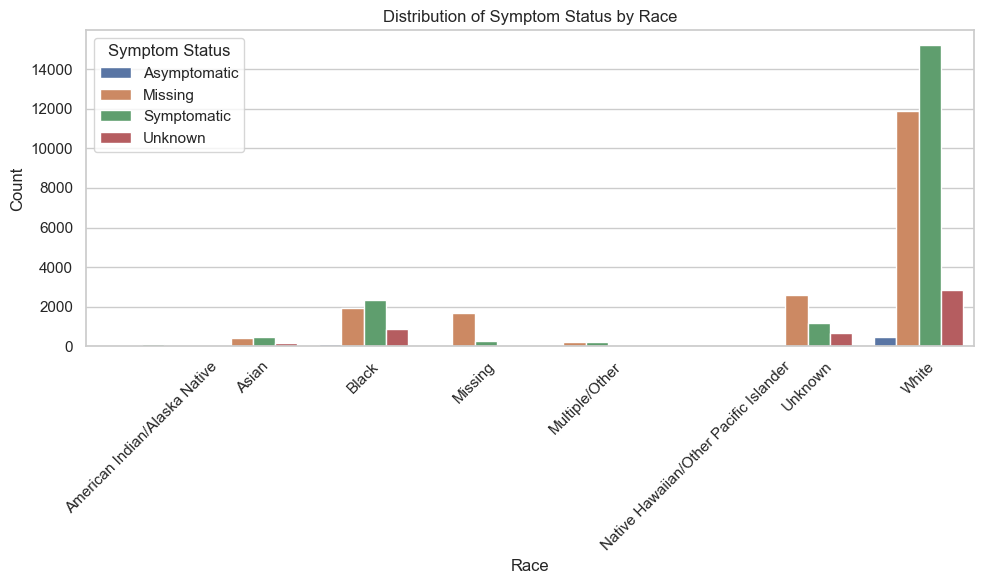

In [103]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='race', hue='symptom_status')
plt.title('Distribution of Symptom Status by Race')
plt.xlabel('Race')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Symptom Status')
plt.tight_layout()
plt.show()

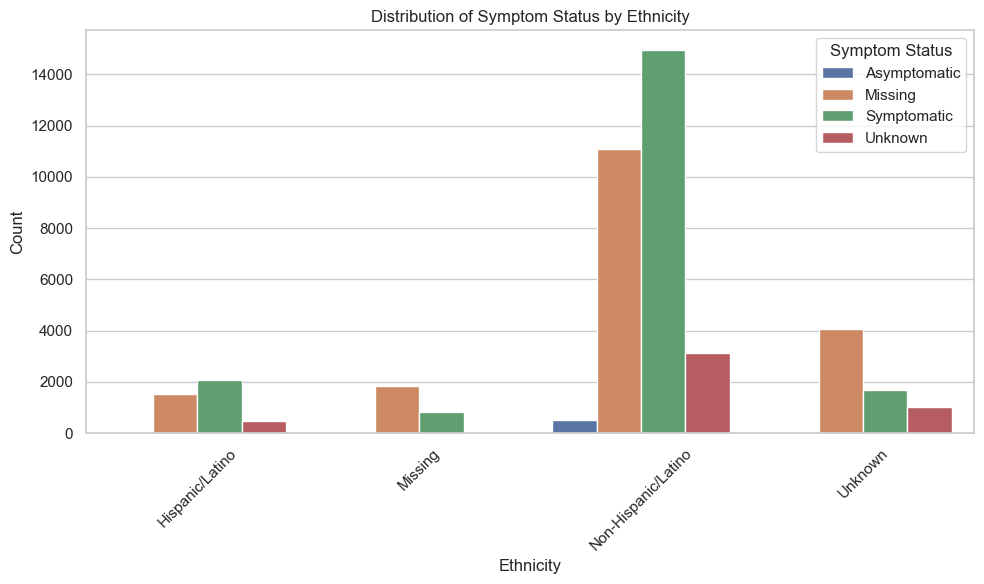

In [104]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='ethnicity', hue='symptom_status')
plt.title('Distribution of Symptom Status by Ethnicity')
plt.xlabel('Ethnicity')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Symptom Status')
plt.tight_layout()
plt.show()

- Analyzing the correlation between hospitalization and death occurrences to understand the impact of hospitalization on mortality rates:

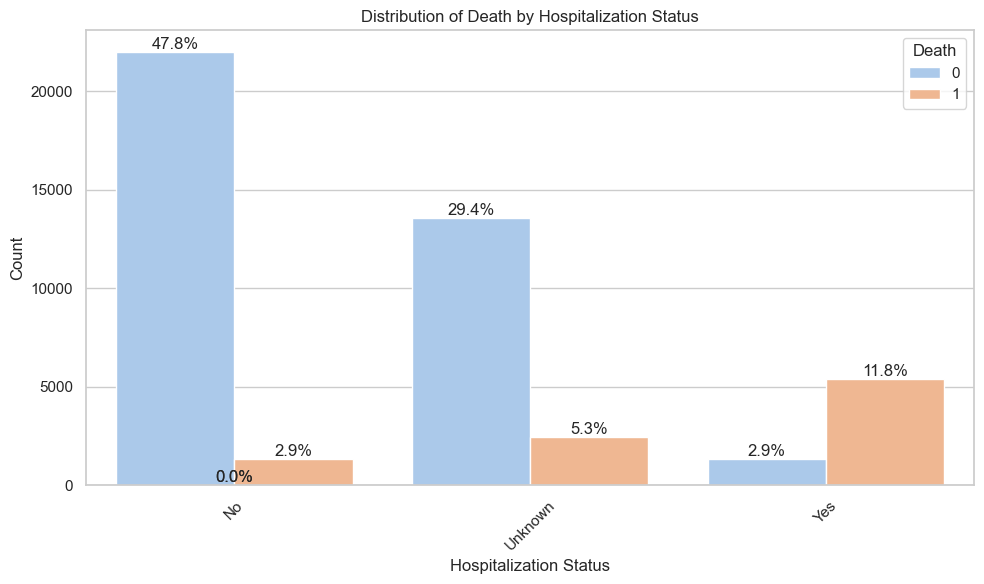

In [105]:
plt.figure(figsize=(10, 6))
ax = sns.countplot(data=df_corrected_dataset, x='hosp_yn', hue='death_yn_numeric', palette='pastel')

plt.title('Distribution of Death by Hospitalization Status')
plt.xlabel('Hospitalization Status')
plt.ylabel('Count')
plt.legend(title='Death')

# Calculating percentage of death for each category
total = len(df_corrected_dataset)
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height/total:.1%}', (p.get_x() + p.get_width() / 2., height), ha='center', va='bottom')

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

- Investigating the relationship between current status and death occurrences to understand how the current medical condition of individuals correlates with mortality rates:

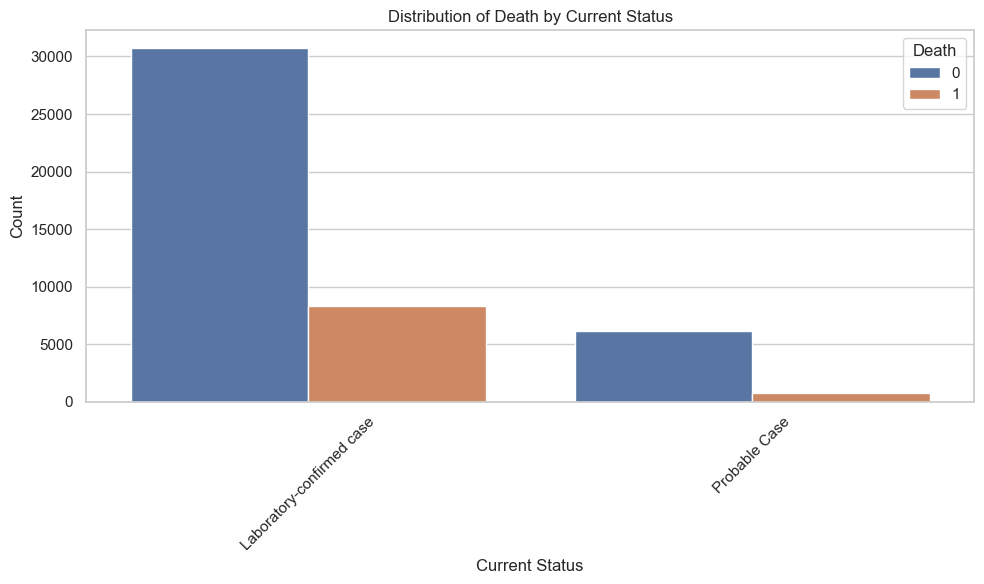

In [106]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df_corrected_dataset, x='current_status', hue='death_yn_numeric')
plt.title('Distribution of Death by Current Status')
plt.xlabel('Current Status')
plt.ylabel('Count')
plt.legend(title='Death')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

- Analyzing the association between counties and death occurrences to explore geographical patterns and variations in mortality rates across different regions (30 most  frequent counties for cases and also for death rate):

<Figure size 1200x800 with 0 Axes>

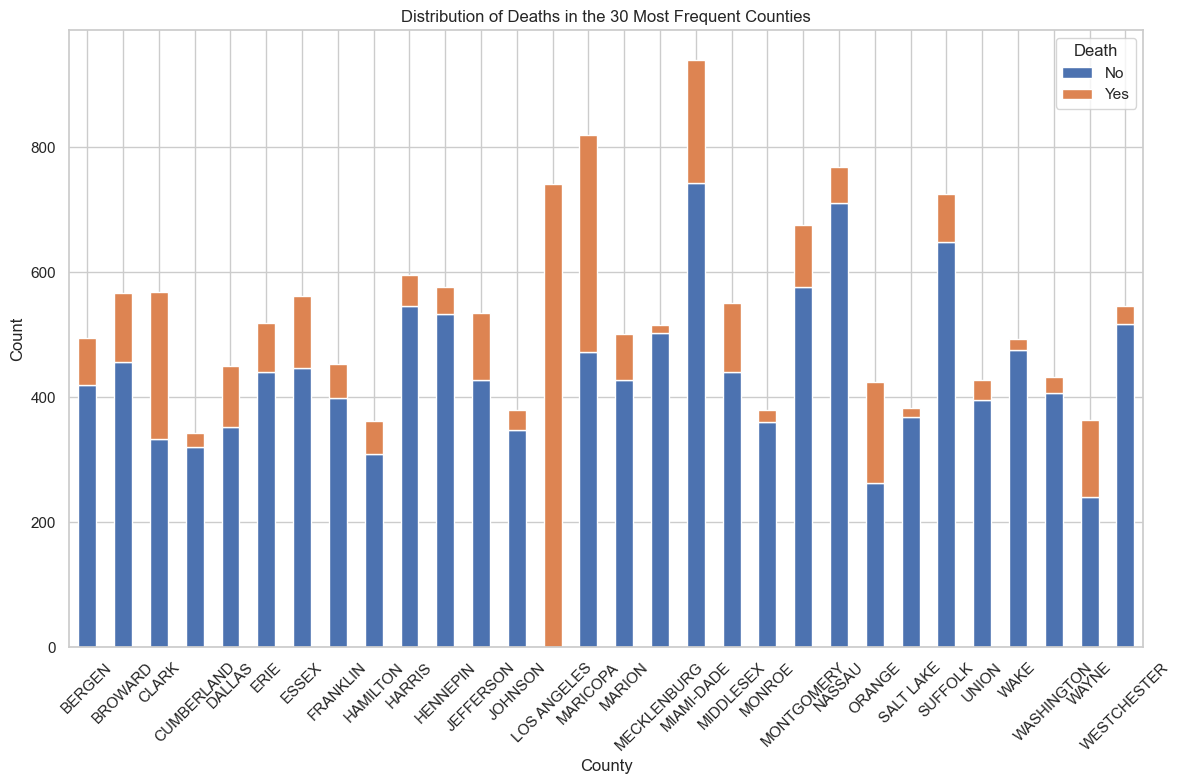

In [107]:
top_counties = df_corrected_dataset['res_county'].value_counts().nlargest(30).index

top_counties_data = df_corrected_dataset[df_corrected_dataset['res_county'].isin(top_counties)]

cross_tab_top = pd.crosstab(top_counties_data['res_county'], top_counties_data['death_yn'])

plt.figure(figsize=(12, 8))
cross_tab_top.plot(kind='bar', stacked=True, figsize=(12, 8))
plt.title('Distribution of Deaths in the 30 Most Frequent Counties')
plt.xlabel('County')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Death')
plt.tight_layout()
plt.show()


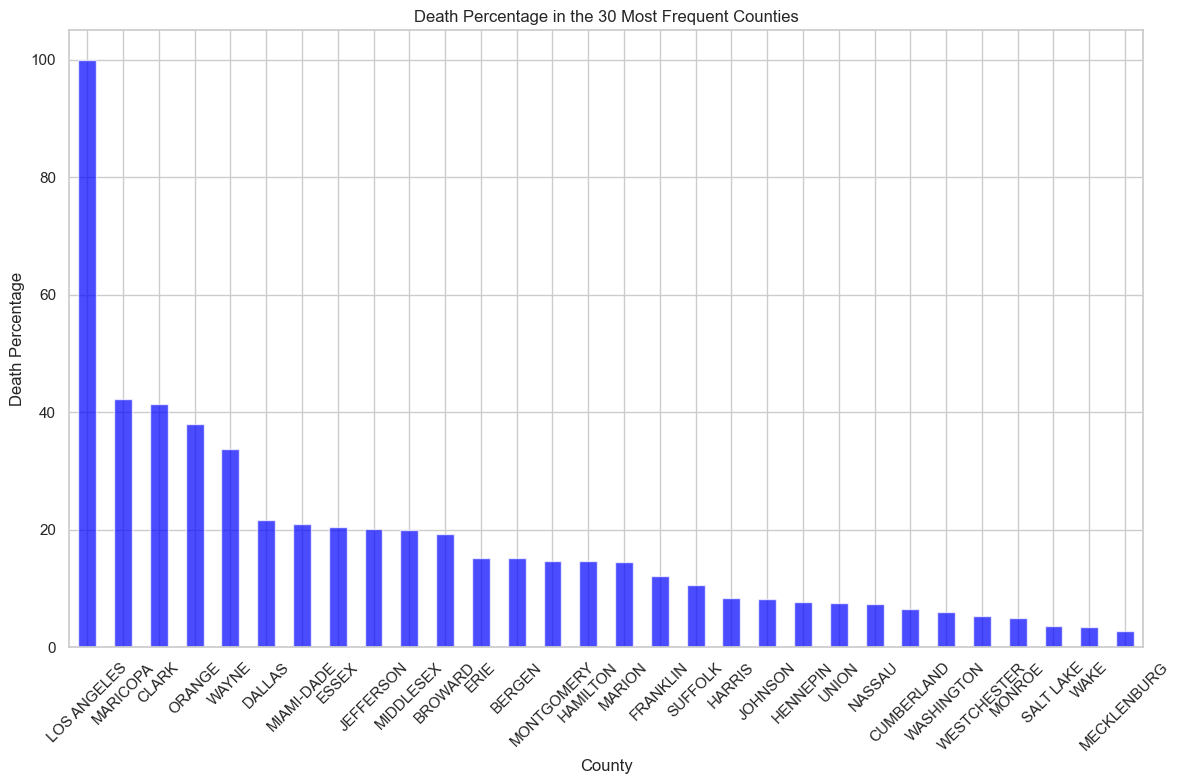

In [108]:
top_counties = df_corrected_dataset['res_county'].value_counts().nlargest(30).index

top_counties_data = df_corrected_dataset[df_corrected_dataset['res_county'].isin(top_counties)]

cross_tab_top = pd.crosstab(top_counties_data['res_county'], top_counties_data['death_yn'])

cross_tab_top['Death Percentage'] = cross_tab_top['Yes'] / (cross_tab_top['Yes'] + cross_tab_top['No']) * 100

cross_tab_top = cross_tab_top.sort_values(by='Death Percentage', ascending=False)

plt.figure(figsize=(12, 8))
cross_tab_top['Death Percentage'].plot(kind='bar', color='blue', alpha=0.7)
plt.title('Death Percentage in the 30 Most Frequent Counties')
plt.xlabel('County')
plt.ylabel('Death Percentage')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


- Investigating the correlation between states and death occurrences to understand how mortality rates vary across different states (30 most  frequent states for cases and also for death rate):

<Figure size 1200x800 with 0 Axes>

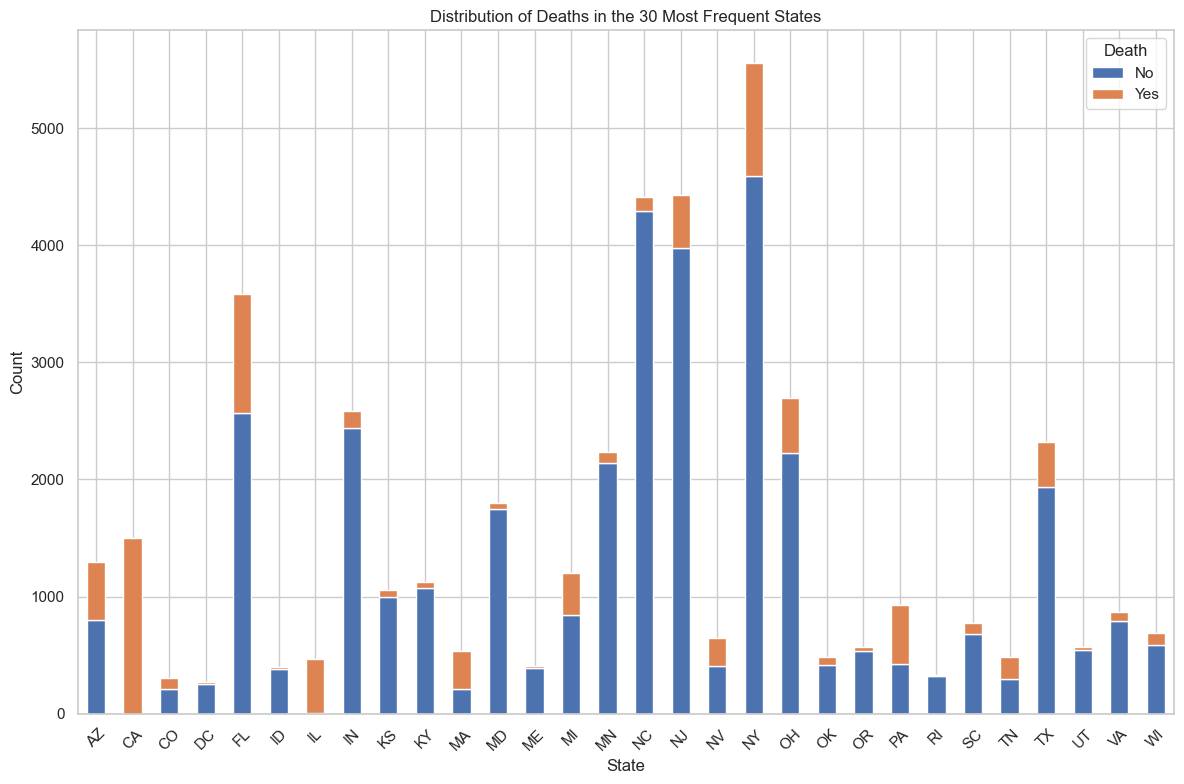

In [109]:
top_states = df_corrected_dataset['res_state'].value_counts().nlargest(30).index
top_states_data = df_corrected_dataset[df_corrected_dataset['res_state'].isin(top_states)]

cross_tab_top = pd.crosstab(top_states_data['res_state'], top_states_data['death_yn'])

plt.figure(figsize=(12, 8))
cross_tab_top.plot(kind='bar', stacked=True, figsize=(12, 8))
plt.title('Distribution of Deaths in the 30 Most Frequent States')
plt.xlabel('State')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Death')
plt.tight_layout()
plt.show()

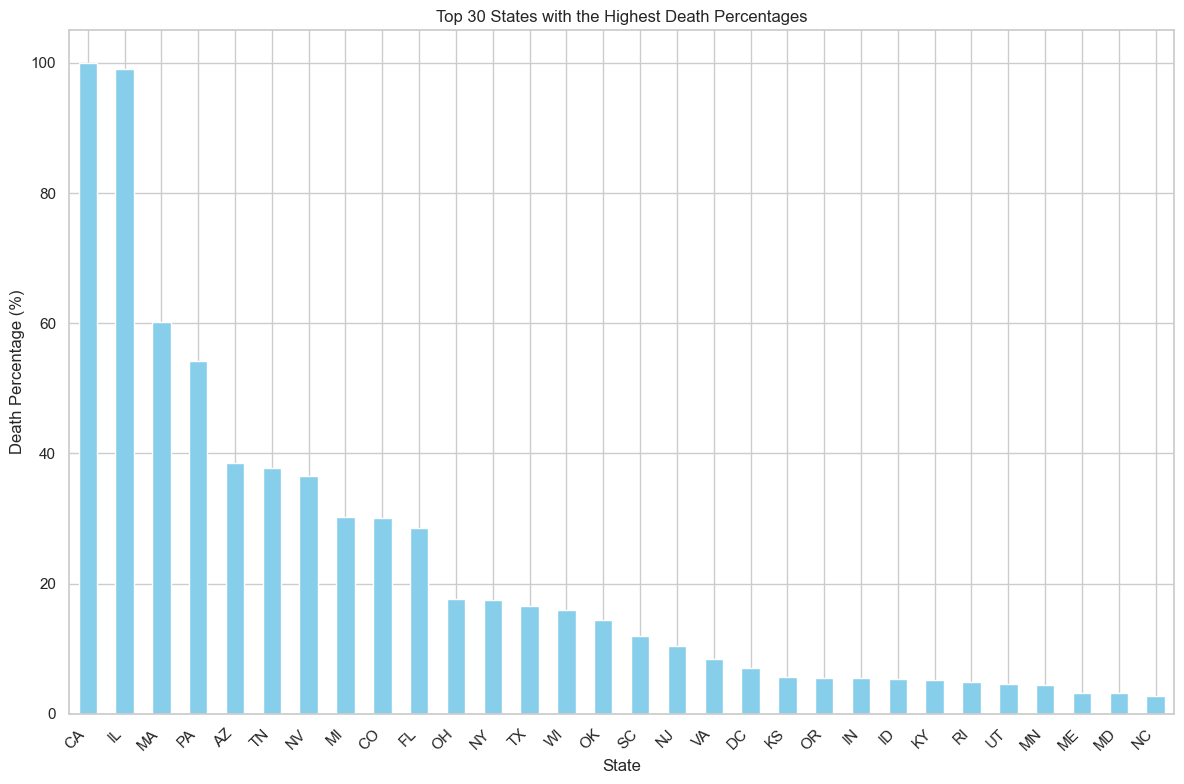

In [110]:
top_states = df_corrected_dataset['res_state'].value_counts().nlargest(30).index
top_states_data = df_corrected_dataset[df_corrected_dataset['res_state'].isin(top_states)]

cross_tab_top = pd.crosstab(top_states_data['res_state'], top_states_data['death_yn'])
death_percentages = cross_tab_top['Yes'] / cross_tab_top.sum(axis=1) * 100
death_percentages_sorted = death_percentages.sort_values(ascending=False)  # Sort the death percentages in descending order

plt.figure(figsize=(12, 8))
death_percentages_sorted.plot(kind='bar', color='skyblue')
plt.title('Top 30 States with the Highest Death Percentages')
plt.xlabel('State')
plt.ylabel('Death Percentage (%)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

- Investigating the relationship between the month and death occurrences, which can provide valuable insights into seasonal patterns or trends in mortality rates (30 most frequent months based on cases and death occurrences):

<Figure size 1200x800 with 0 Axes>

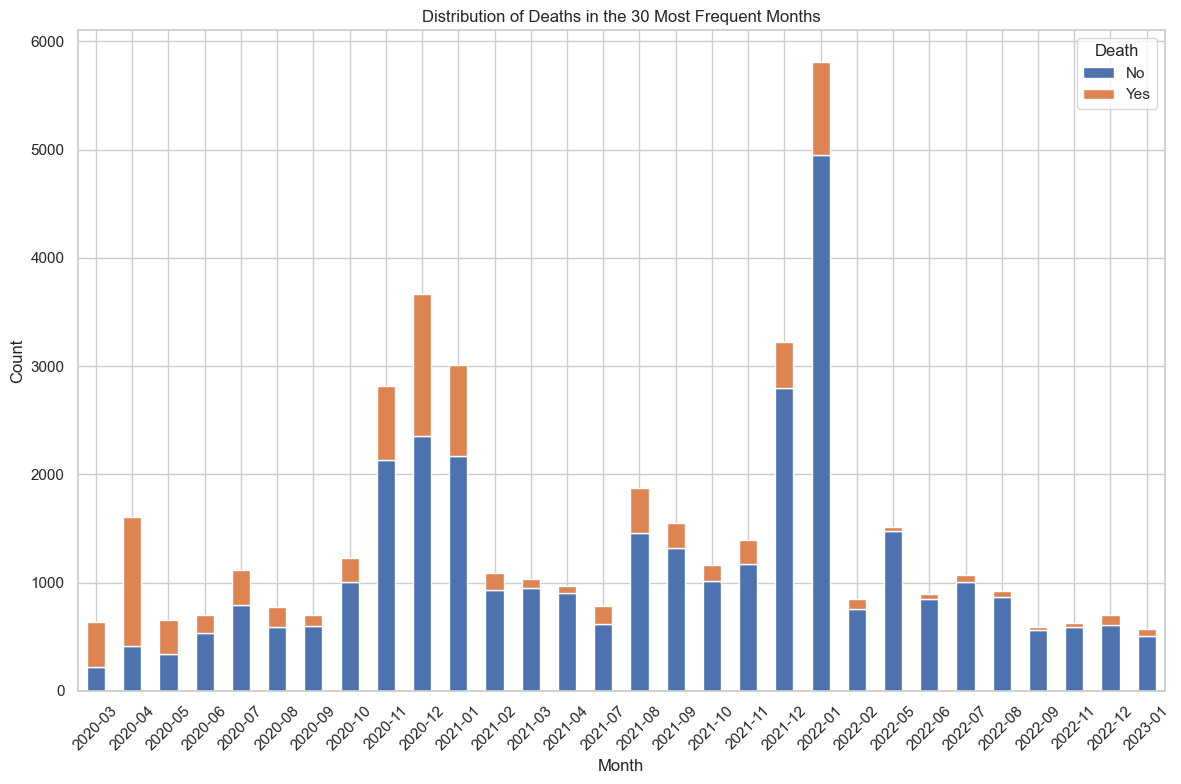

In [111]:
top_months = df_corrected_dataset['case_month'].value_counts().nlargest(30).index

top_months_data = df_corrected_dataset[df_corrected_dataset['case_month'].isin(top_months)]

cross_tab_top_months = pd.crosstab(top_months_data['case_month'], top_months_data['death_yn'])

plt.figure(figsize=(12, 8))
cross_tab_top_months.plot(kind='bar', stacked=True, figsize=(12, 8))
plt.title('Distribution of Deaths in the 30 Most Frequent Months')
plt.xlabel('Month')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Death')
plt.tight_layout()
plt.show()


/var/folders/6j/tmdg_xx172xb1xtgxd35y2400000gn/T/ipykernel_29052/268523320.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  monthly_data = df_corrected_dataset.groupby(['case_month', 'death_yn']).size().unstack(fill_value=0)


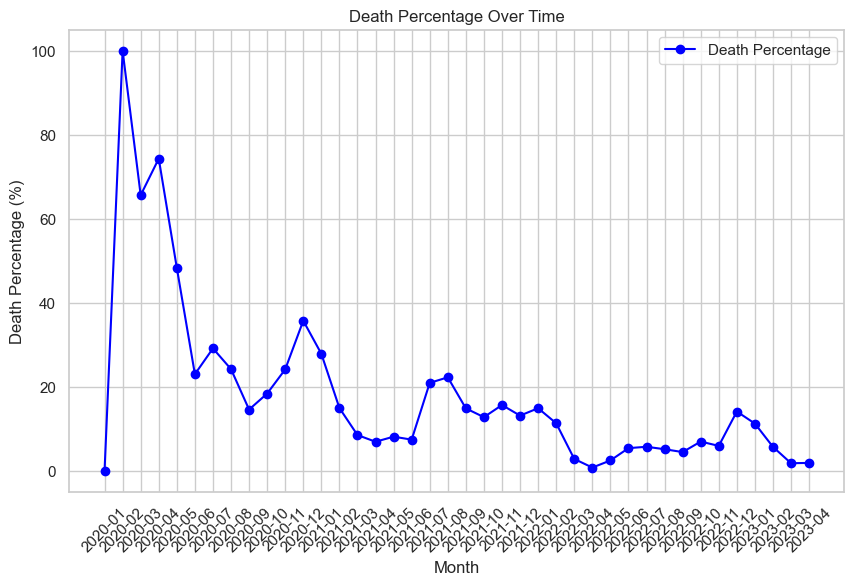

In [112]:
monthly_data = df_corrected_dataset.groupby(['case_month', 'death_yn']).size().unstack(fill_value=0)

monthly_data['death_percentage'] = (monthly_data['Yes'] / (monthly_data['Yes'] + monthly_data['No'])) * 100

plt.figure(figsize=(10, 6))

plt.plot(monthly_data.index, monthly_data['death_percentage'], marker='o', color='blue', label='Death Percentage')

plt.title('Death Percentage Over Time')
plt.xlabel('Month')
plt.ylabel('Death Percentage (%)')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()

In [113]:
deaths_df = df_corrected_dataset[df_corrected_dataset['death_yn'] == 'Yes']

deaths_by_month = deaths_df.groupby('case_month').size()

month_with_most_deaths = deaths_by_month.idxmax()
highest_deaths_count = deaths_by_month.max()

print(f"The month with the highest number of deaths is {month_with_most_deaths} with {highest_deaths_count} deaths.")


The month with the highest number of deaths is 2020-12 with 1308 deaths.


/var/folders/6j/tmdg_xx172xb1xtgxd35y2400000gn/T/ipykernel_29052/637048183.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  deaths_by_month = deaths_df.groupby('case_month').size()


In [114]:
cases_by_month = df_corrected_dataset.groupby('case_month').size()

month_with_most_cases = cases_by_month.idxmax()
highest_cases_count = cases_by_month.max()

print(f"The month with the highest number of cases is {month_with_most_cases} with {highest_cases_count} cases.")


The month with the highest number of cases is 2022-01 with 5810 cases.


/var/folders/6j/tmdg_xx172xb1xtgxd35y2400000gn/T/ipykernel_29052/3931885283.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  cases_by_month = df_corrected_dataset.groupby('case_month').size()


- Investigating the correlation between missing case onset interval and death occurrences to understand if the absence of onset interval information is associated with mortality rates:

/var/folders/6j/tmdg_xx172xb1xtgxd35y2400000gn/T/ipykernel_29052/907050336.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  missing_onset_data = df_corrected_dataset.groupby('missing_case_onset_interval')['death_yn'].value_counts(normalize=True).unstack().fillna(0)


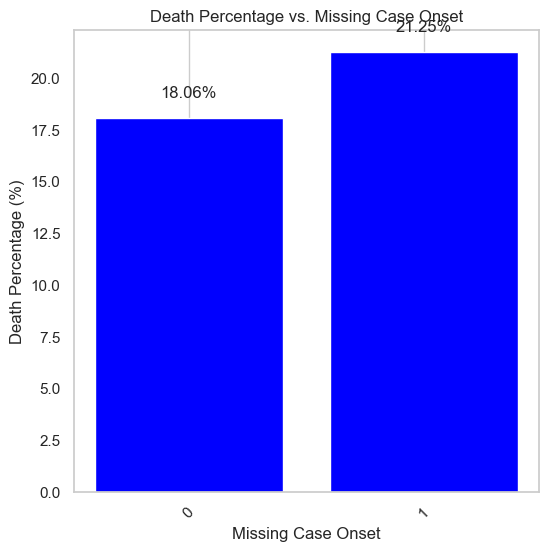

In [115]:
missing_onset_data = df_corrected_dataset.groupby('missing_case_onset_interval')['death_yn'].value_counts(normalize=True).unstack().fillna(0)

missing_onset_data = missing_onset_data.reindex(columns=['Yes', 'No'], fill_value=0)

missing_onset_data['death_percentage'] = missing_onset_data['Yes'] * 100

plt.figure(figsize=(6, 6))
plt.bar(missing_onset_data.index.astype(str), missing_onset_data['death_percentage'], color='blue')
plt.title('Death Percentage vs. Missing Case Onset')
plt.xlabel('Missing Case Onset')
plt.ylabel('Death Percentage (%)')
plt.xticks(rotation=45)
plt.grid(axis='y')

for i, percentage in enumerate(missing_onset_data['death_percentage']):
    plt.text(i, percentage + 1, f'{percentage:.2f}%', ha='center')

plt.show()

PART FOUR: Creating new features

DESCRIPTION: Transforming, extending or combining the existing features to create a few new features:

- "missing_case_onset_interval": A binary indicator (0 or 1) representing whether the case onset interval information is missing (1) or not missing (0).

- "death_yn_numeric": A numerical representation (0 or 1) of death occurrences, where 1 indicates death and 0 indicates no death.

- "age_group_numeric": A numerical representation of age groups, typically encoded as integers to facilitate analysis or modeling.

- "case_positive_specimen_interval_days": The number of days between specimen collection and the positive test result, measured in days.

- Intent features that may be better explored and implemented for the next phase of investigation include vaccination status, vaccine type, variant type, and government policy measures. These features can provide valuable insights into understanding and predicting death trends related to COVID-19.